<a href="https://colab.research.google.com/github/sarthax-makesar/-Computational-Data-Science-in-Physics-1/blob/main/LIGO_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gwpy numpy scipy h5py wget lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=896d44521e9f657413e5f5501ea968547f69b6236ea0406b56a1b14e475839ed
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99255 sha256=344c20b7ff407eb883db141c5416eee16d172dfa33ac684c32ba03ce7f51d26a
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43

In [ ]:
import numpy as np
import math
from gwpy.timeseries import TimeSeries
from scipy.linalg import fractional_matrix_power
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py
import wget
import os
import lmfit
from lmfit import Model, minimize, fit_report, Parameters

In [ ]:
import wget
import os

try :
    os.mkdir('PROJ1')
except OSError as error :
    print(error)

wget.download('https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'PROJ1')



'PROJ1/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'

In [ ]:
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<Figure size 900x600 with 0 Axes>

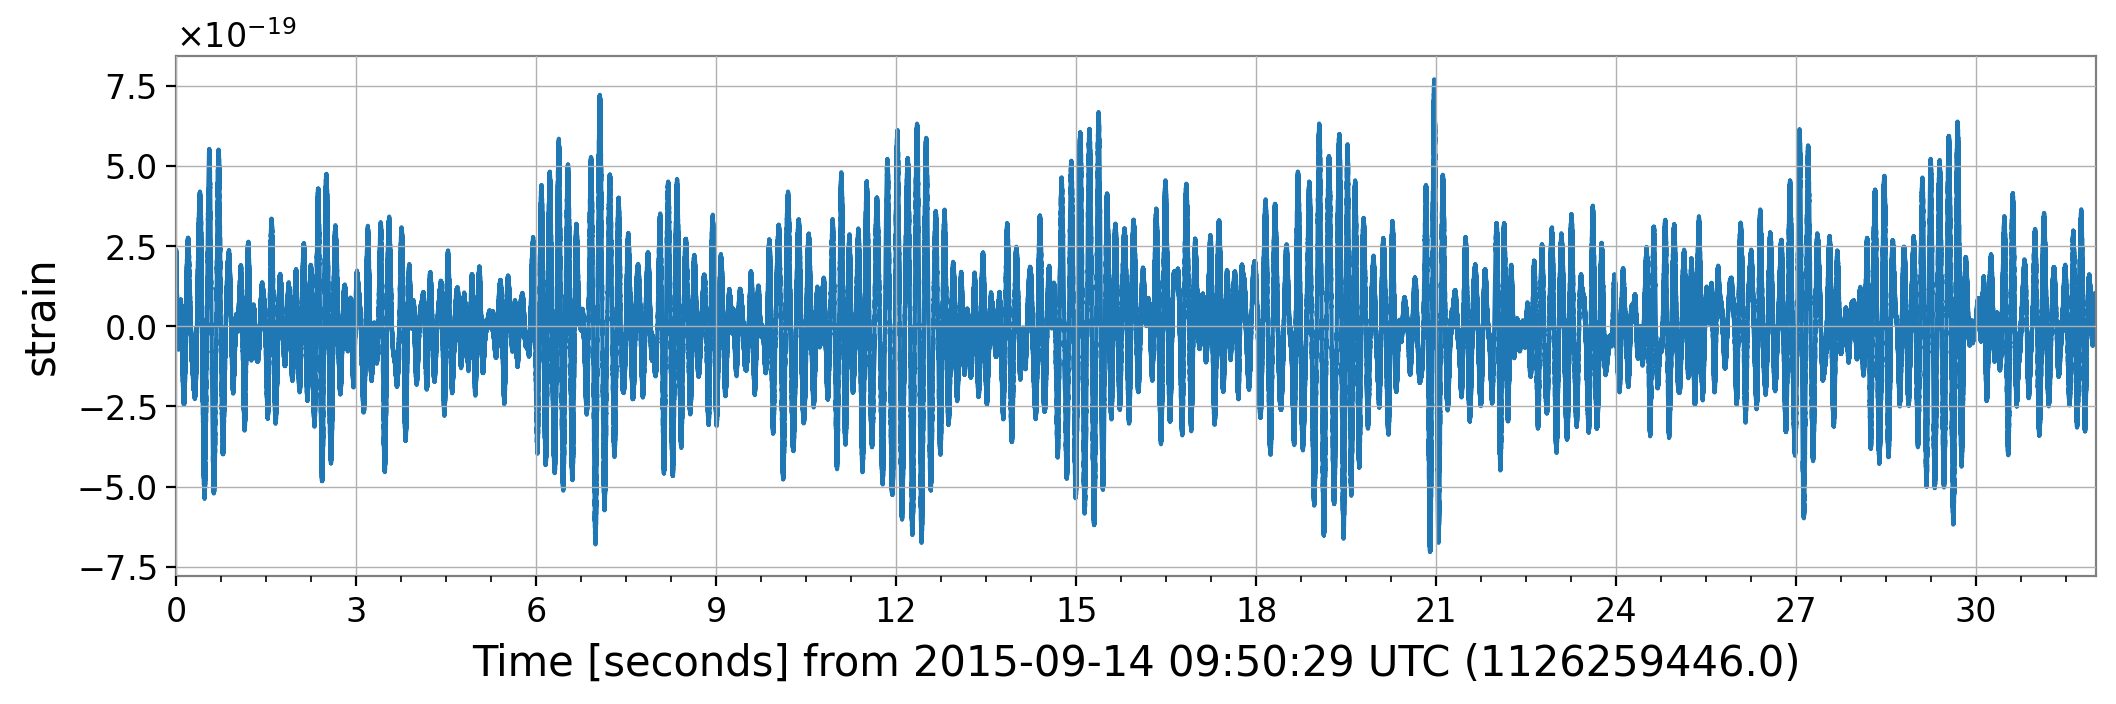

In [ ]:
fn = 'PROJ1/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'
tevent = 1126259462.422
evtname = 'GW150914'
detector = 'H1'

strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(tevent)
strain = strain.crop(center-16,center+16)

plt.figure()
strain.plot()
plt.ylabel('strain')
plt.show()

<Figure size 900x600 with 0 Axes>

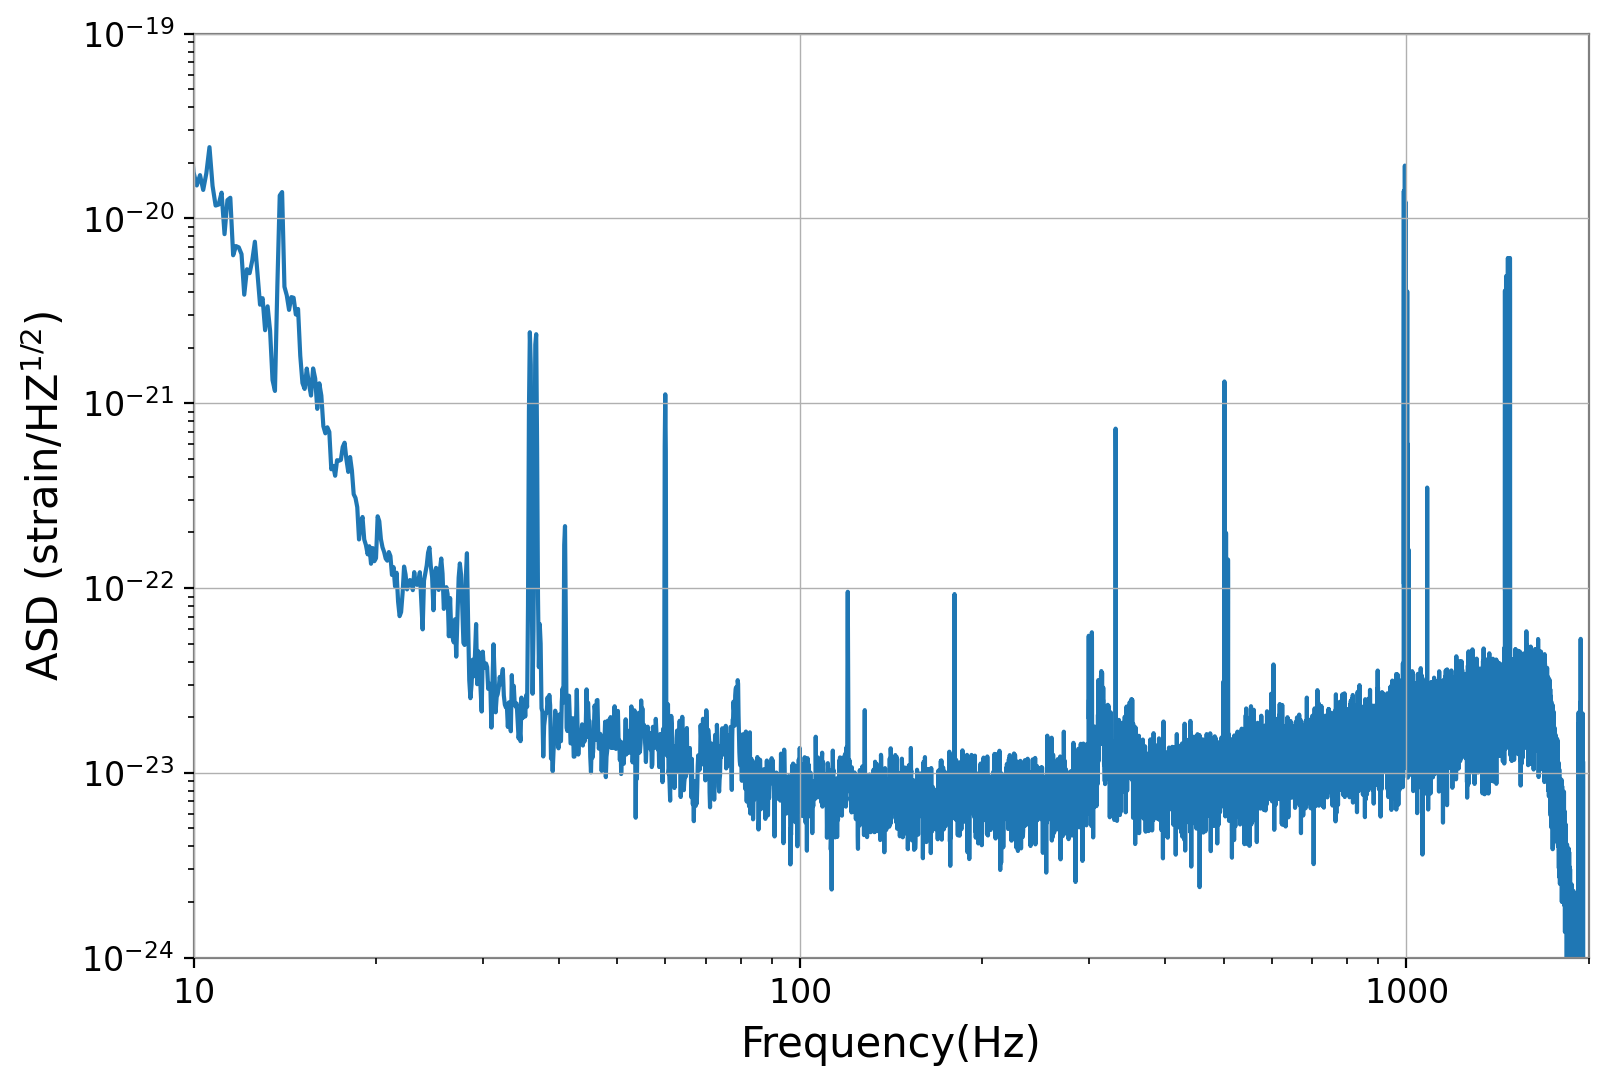

In [ ]:
asd = strain.asd(fftlength=8)
plt.clf()
asd.plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)
plt.ylabel('ASD (strain/HZ$^{1/2})$')
plt.xlabel('Frequency(Hz)')
plt.show()

<Figure size 900x600 with 0 Axes>

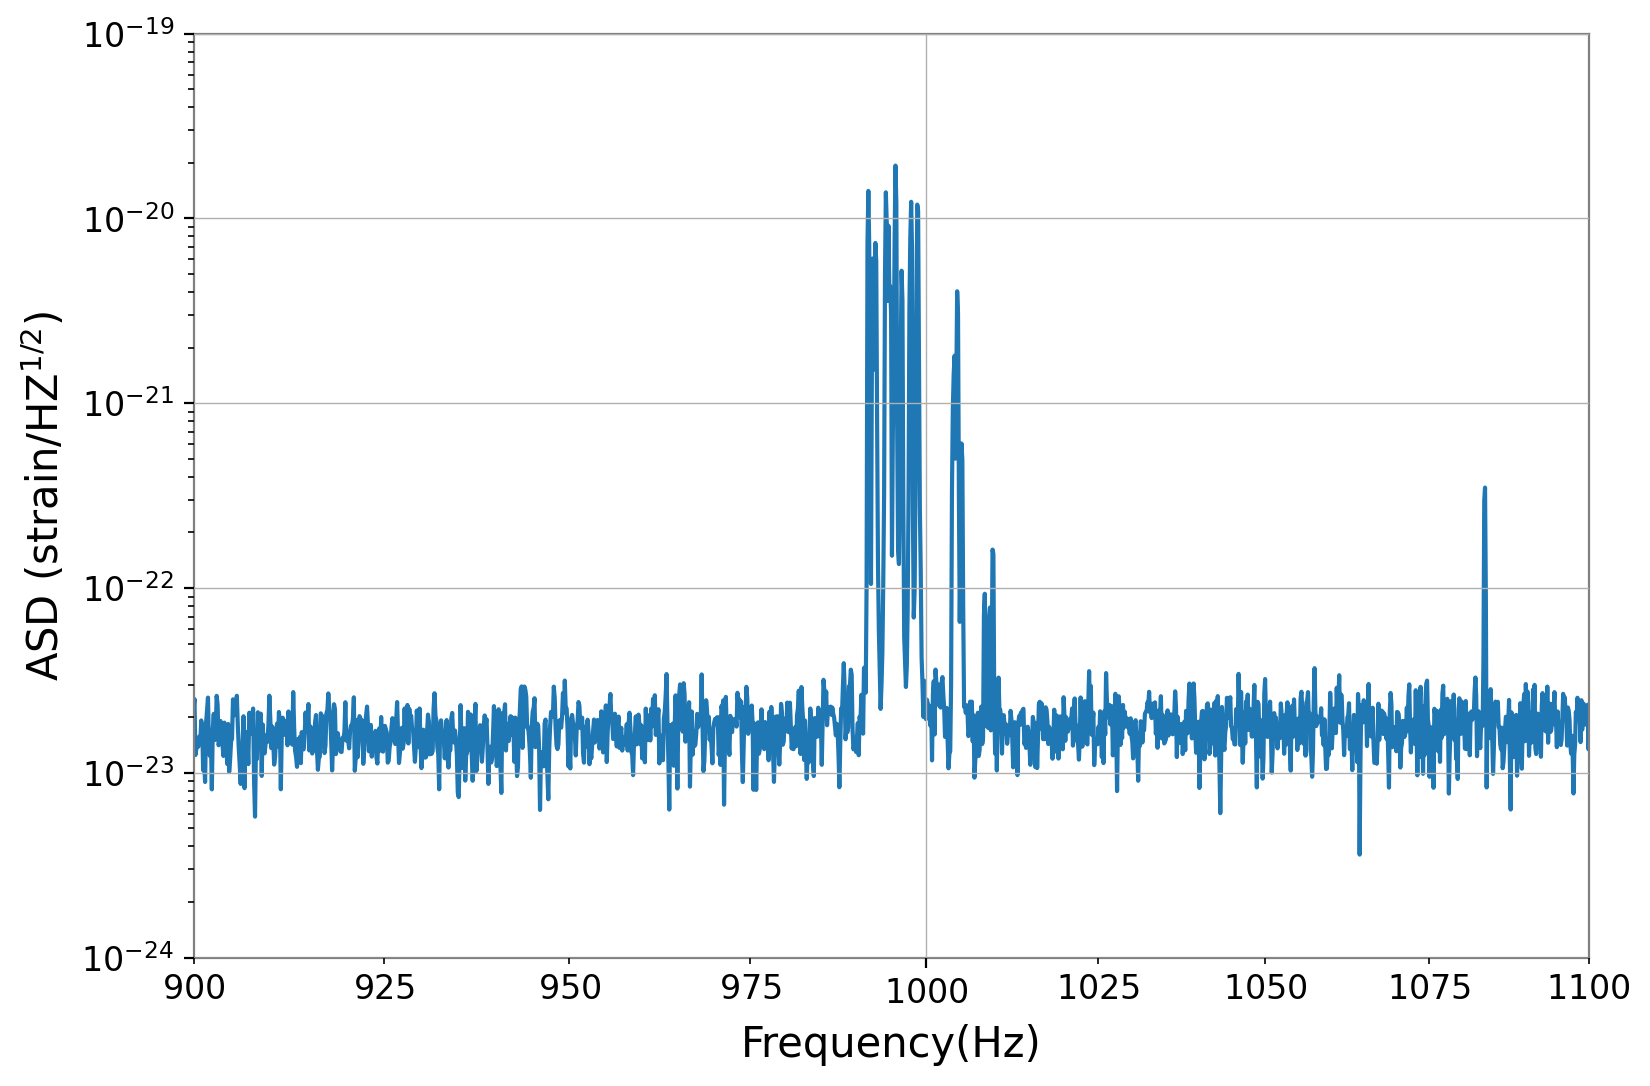

In [ ]:
asd = strain.asd(fftlength=8)
plt.clf()
asd.plot()
plt.xlim(900,1100)
plt.ylim(1e-24, 1e-19)
plt.ylabel('ASD (strain/HZ$^{1/2})$')
plt.xlabel('Frequency(Hz)')
plt.show()

<Figure size 900x600 with 0 Axes>

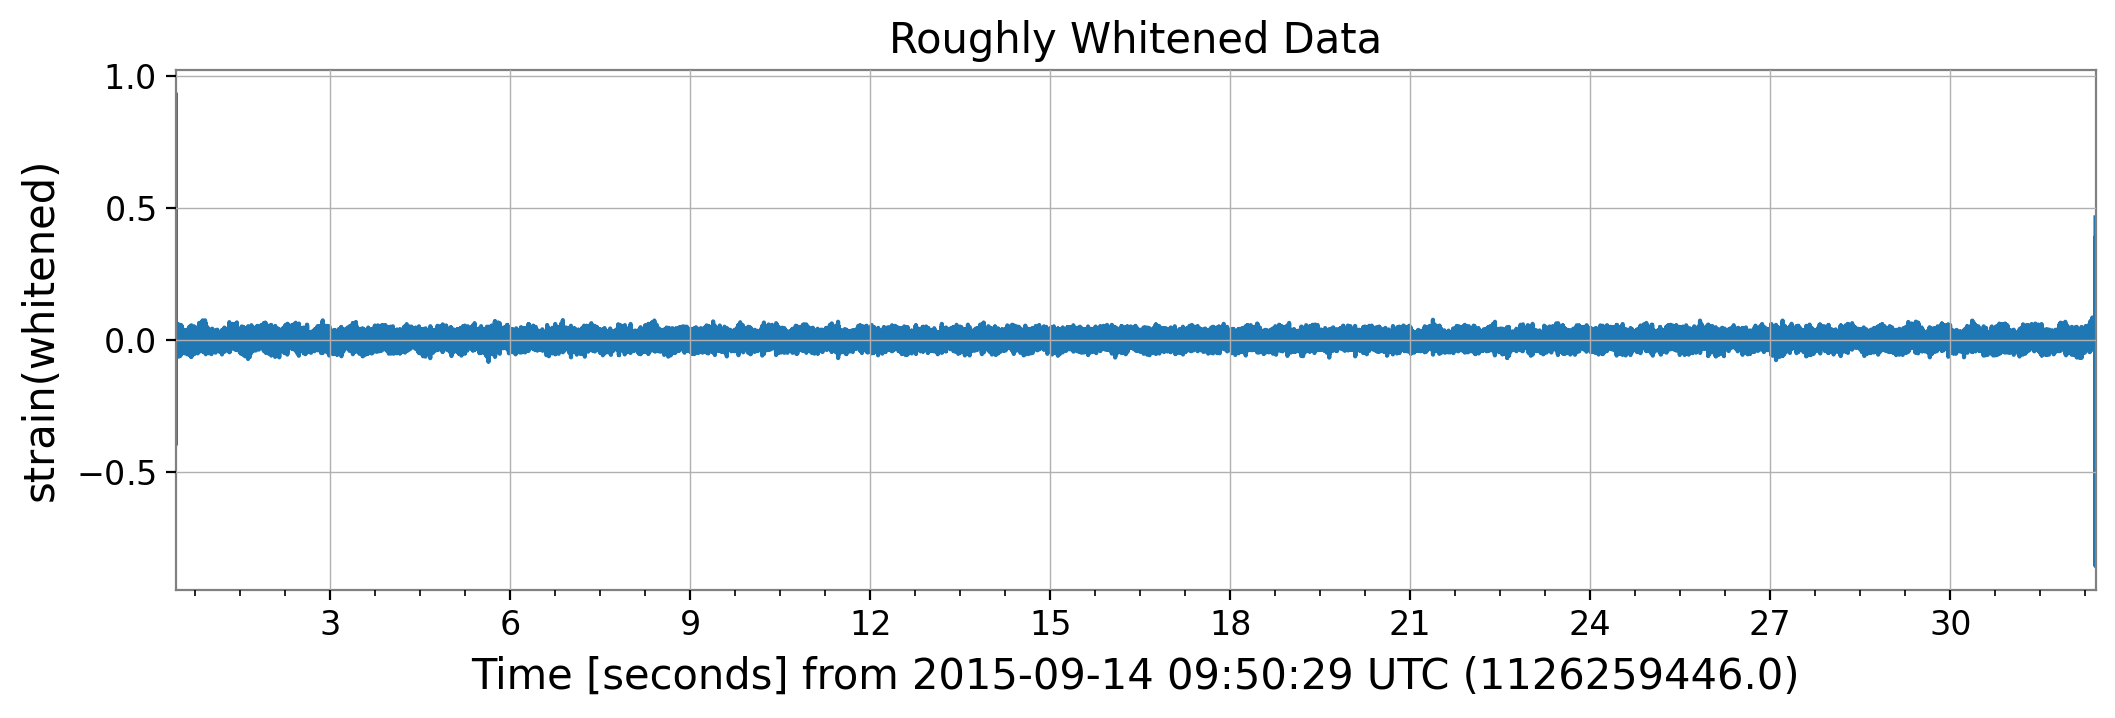

In [ ]:
def rough_whitener(strain_data, crop_window=30):
  asd_data = strain_data.asd()
  fft_data = strain_data.fft()
  whitened = np.fft.irfft(np.abs(1/asd_data)*fft_data)
  return whitened

whitened_timeseries = TimeSeries(rough_whitener(strain))
whitened_timeseries.t0 = tevent -16
whitened_timeseries.dt = 1/4096
plt.clf()
whitened_timeseries[0:-1].plot()
plt.ylabel('strain(whitened)')
plt.title('Roughly Whitened Data')
plt.show()

<Figure size 900x600 with 0 Axes>

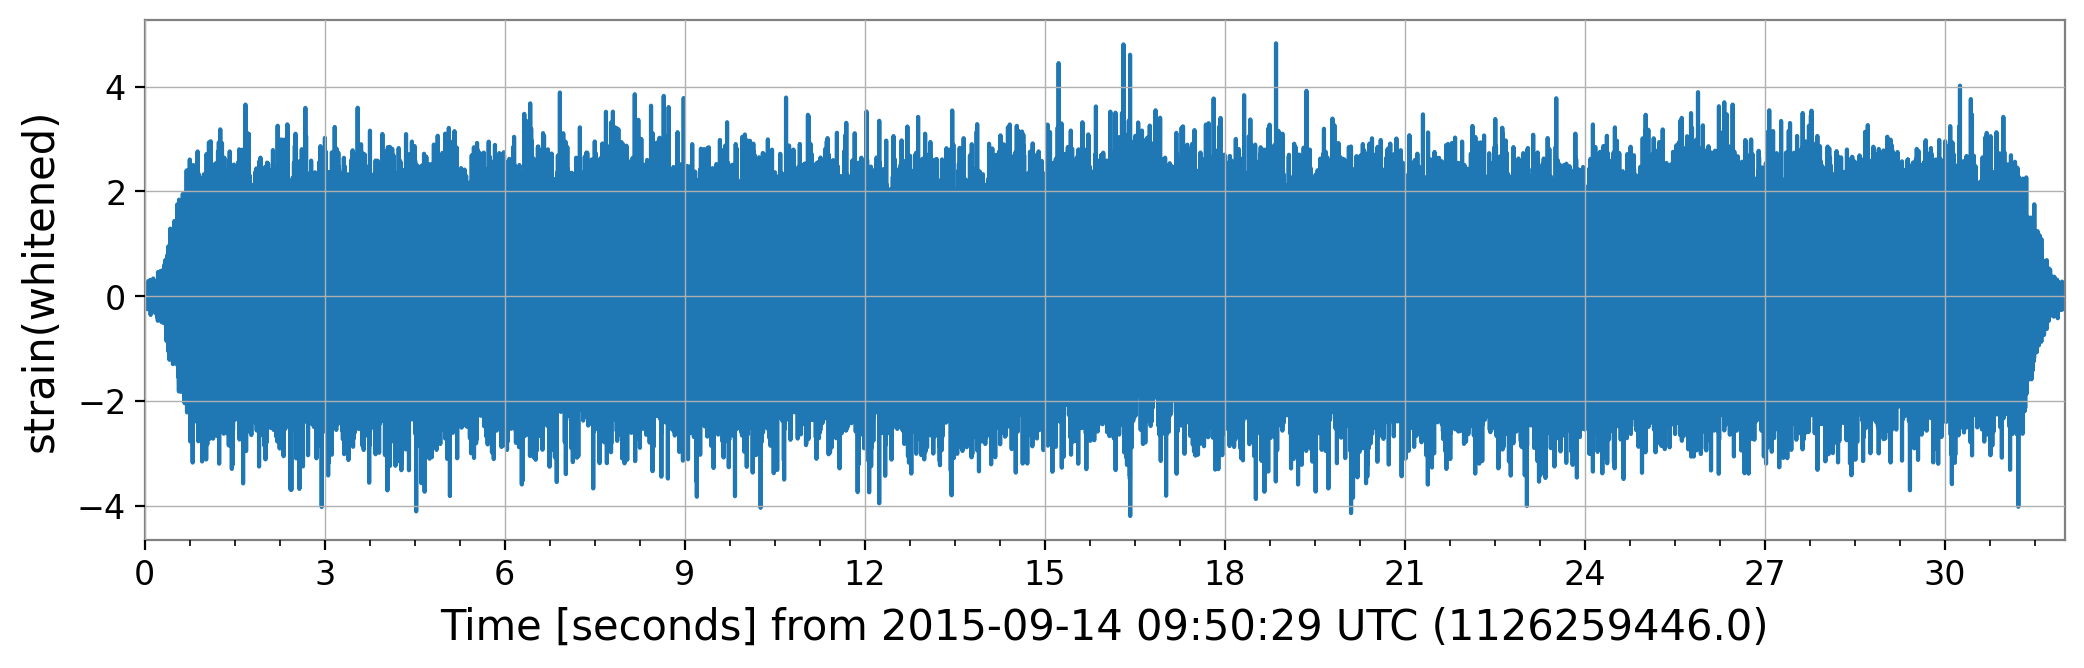

In [ ]:
white_data = strain.whiten()
plt.clf()
white_data.plot()
plt.ylabel('strain(whitened)')
plt.show()

<Figure size 900x600 with 0 Axes>

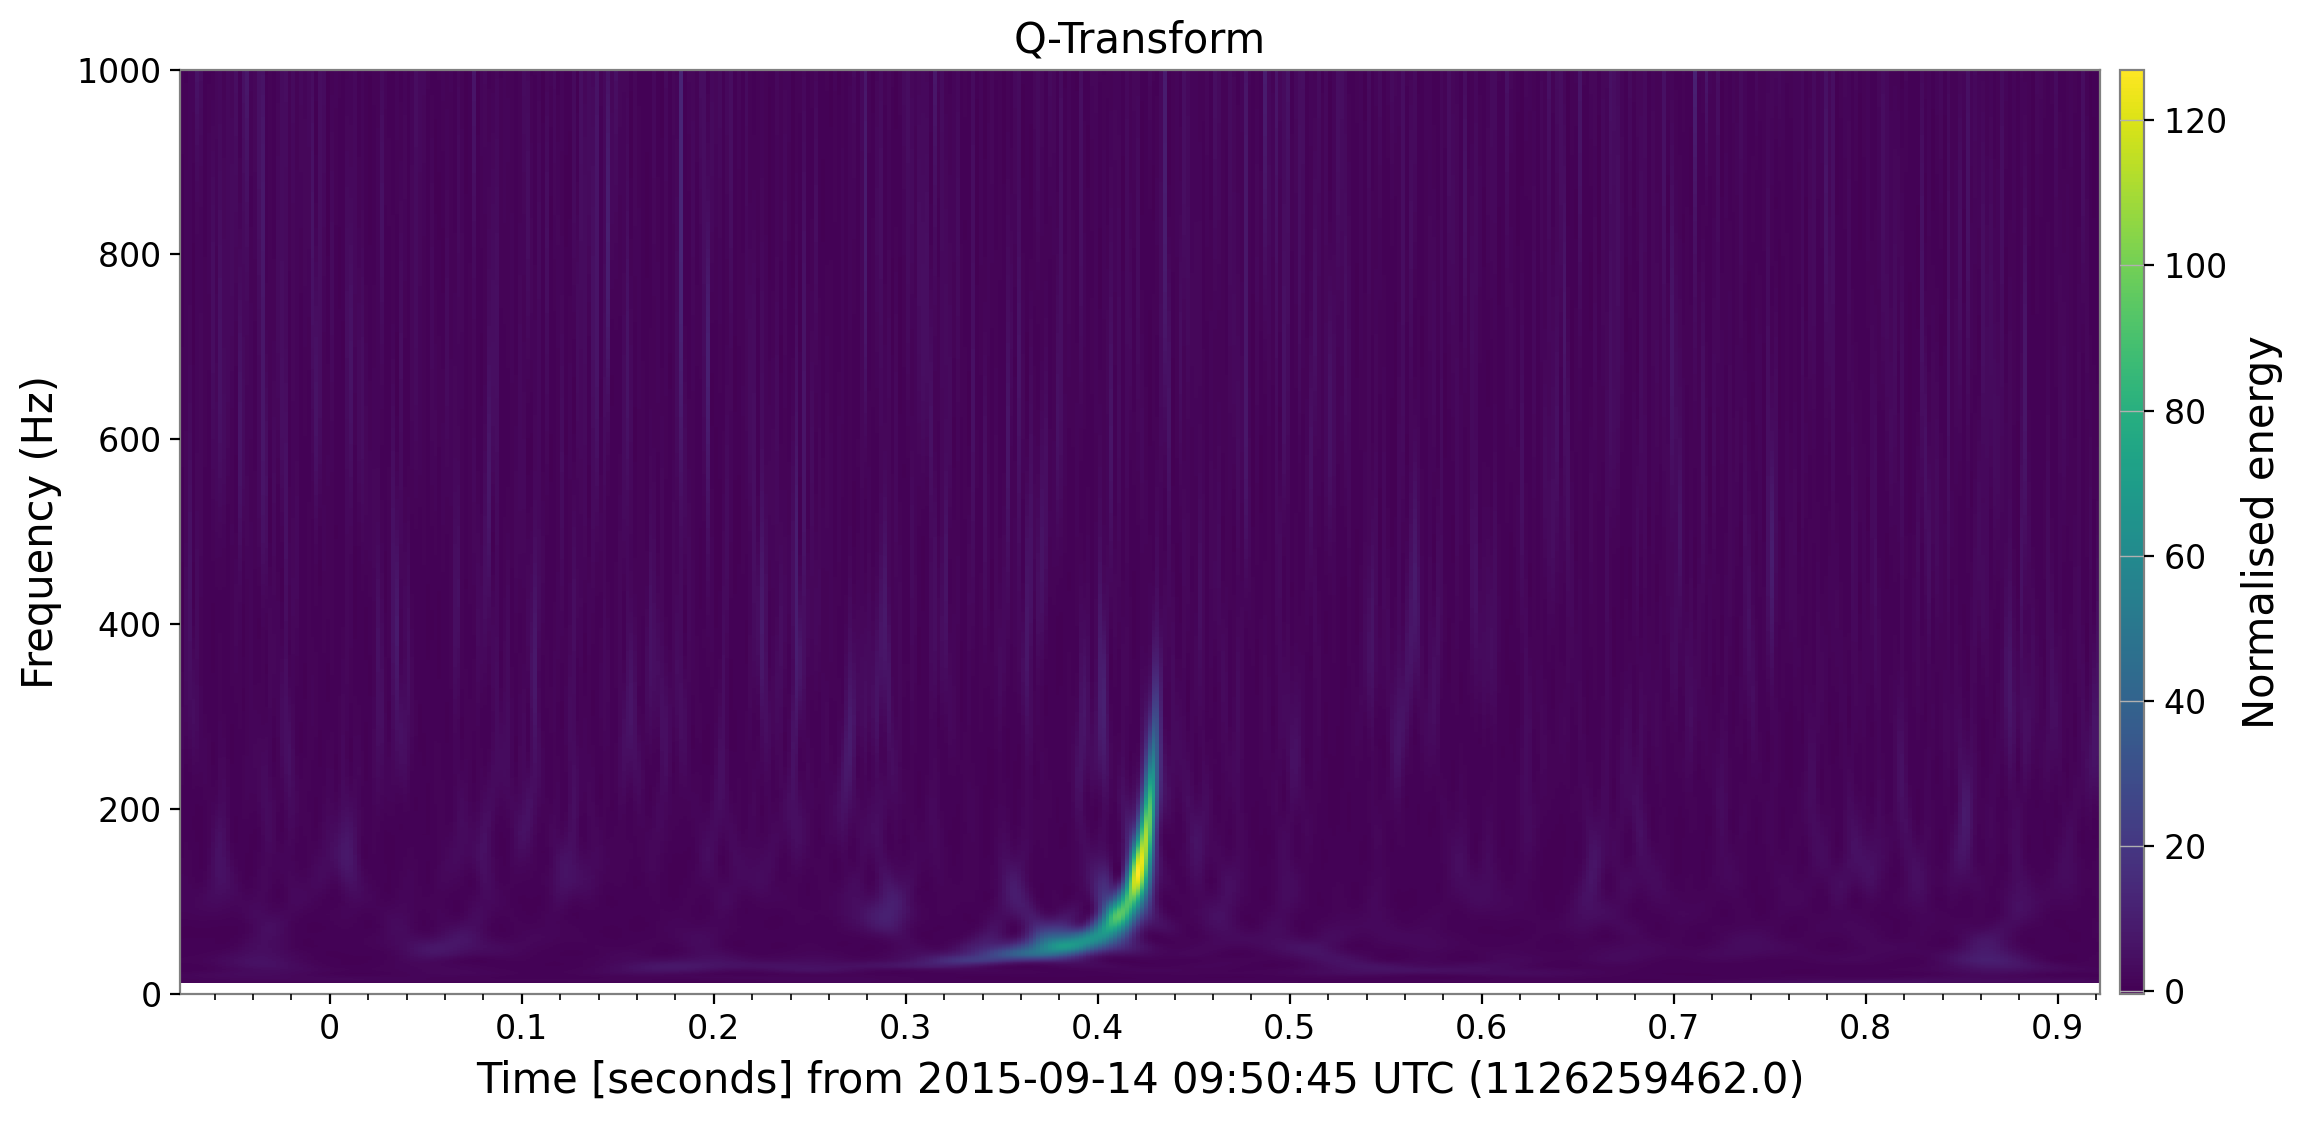

In [ ]:
dt = 1
hq = strain.q_transform(outseg = (tevent-dt, tevent+dt))
plt.clf()
fig = hq.plot()
ax = fig.gca()
fig.colorbar(label= "Normalised energy")
ax.grid(False)
plt.xlim(tevent-0.5, tevent+0.5)
plt.ylim(0,1000)
plt.ylabel('Frequency (Hz)')
plt.title('Q-Transform')
plt.show()

<Figure size 900x600 with 0 Axes>

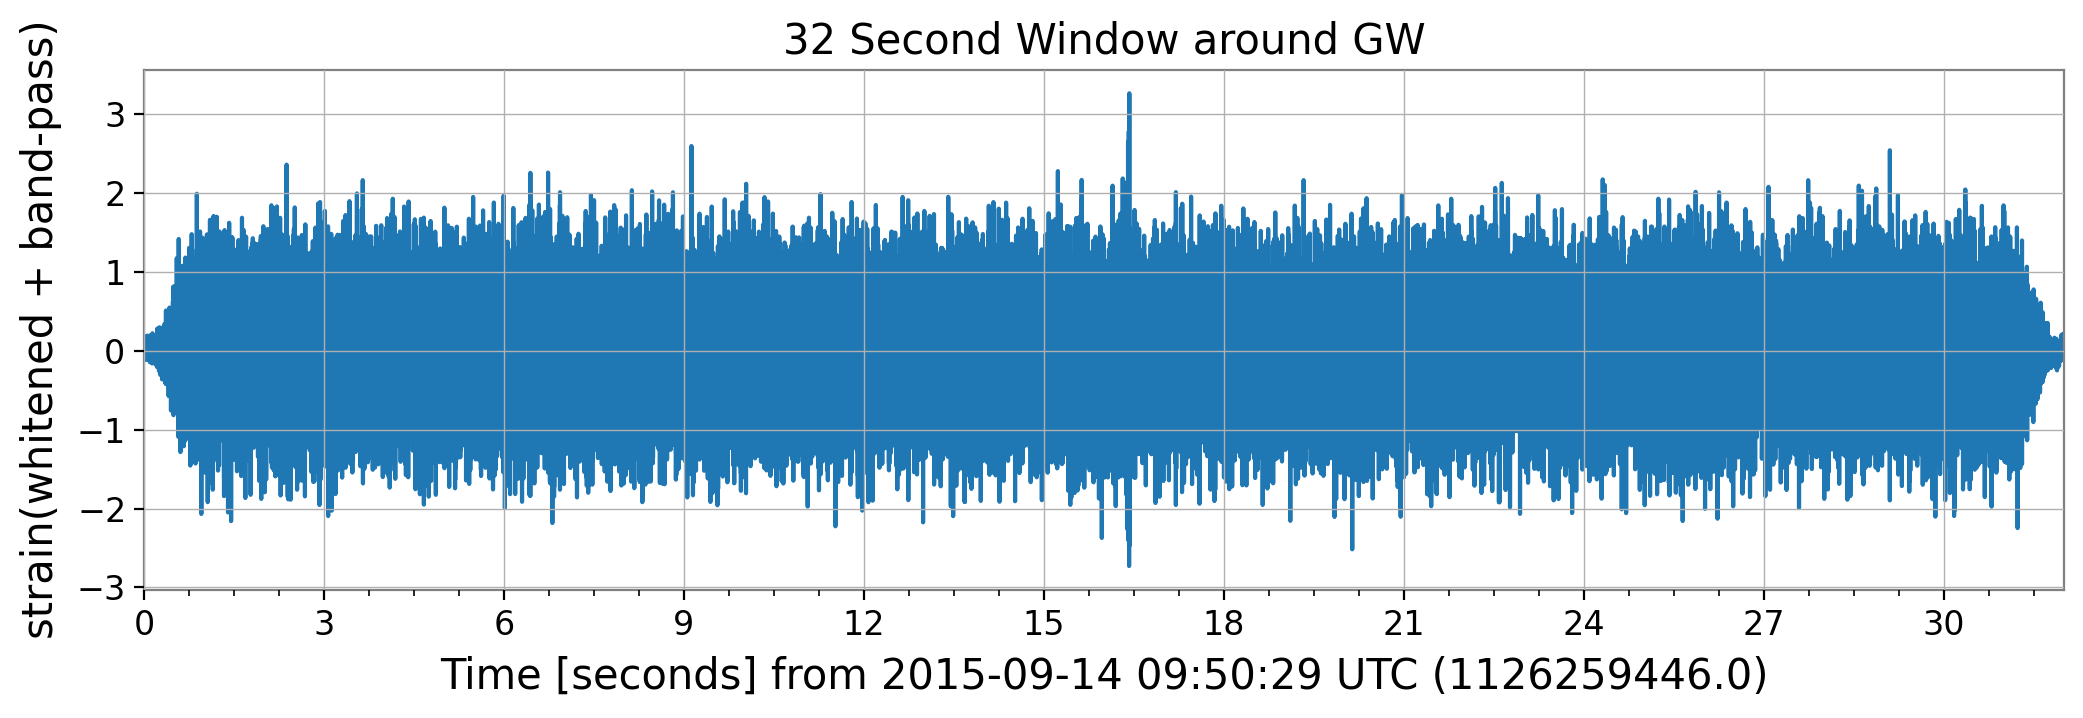

<Figure size 900x600 with 0 Axes>

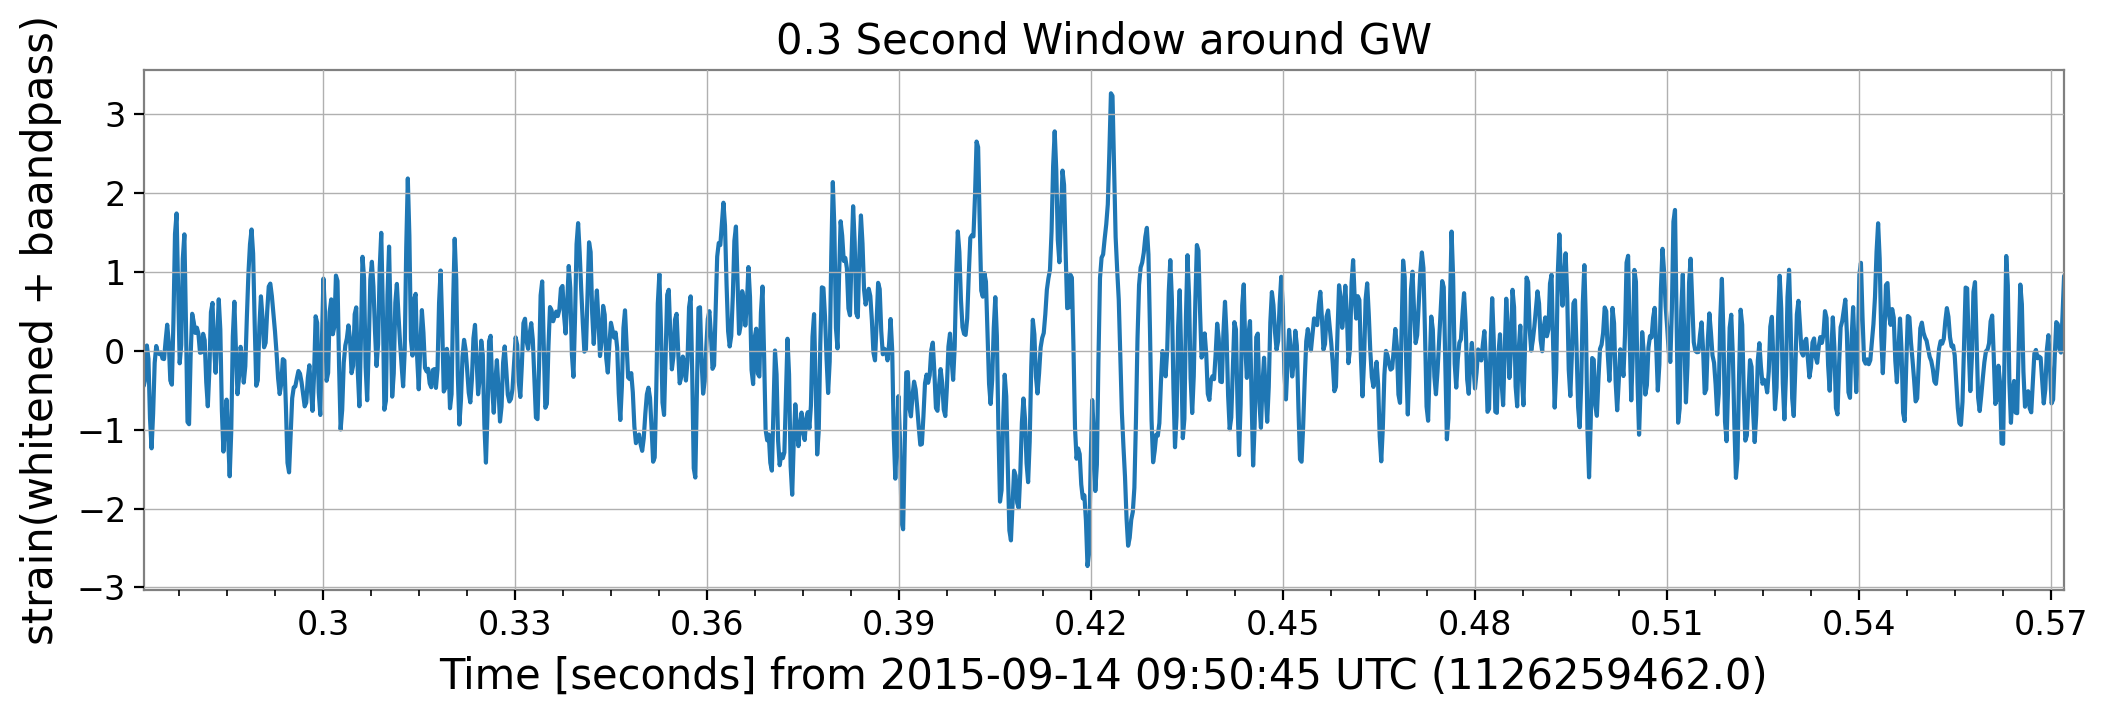

<Figure size 900x600 with 0 Axes>

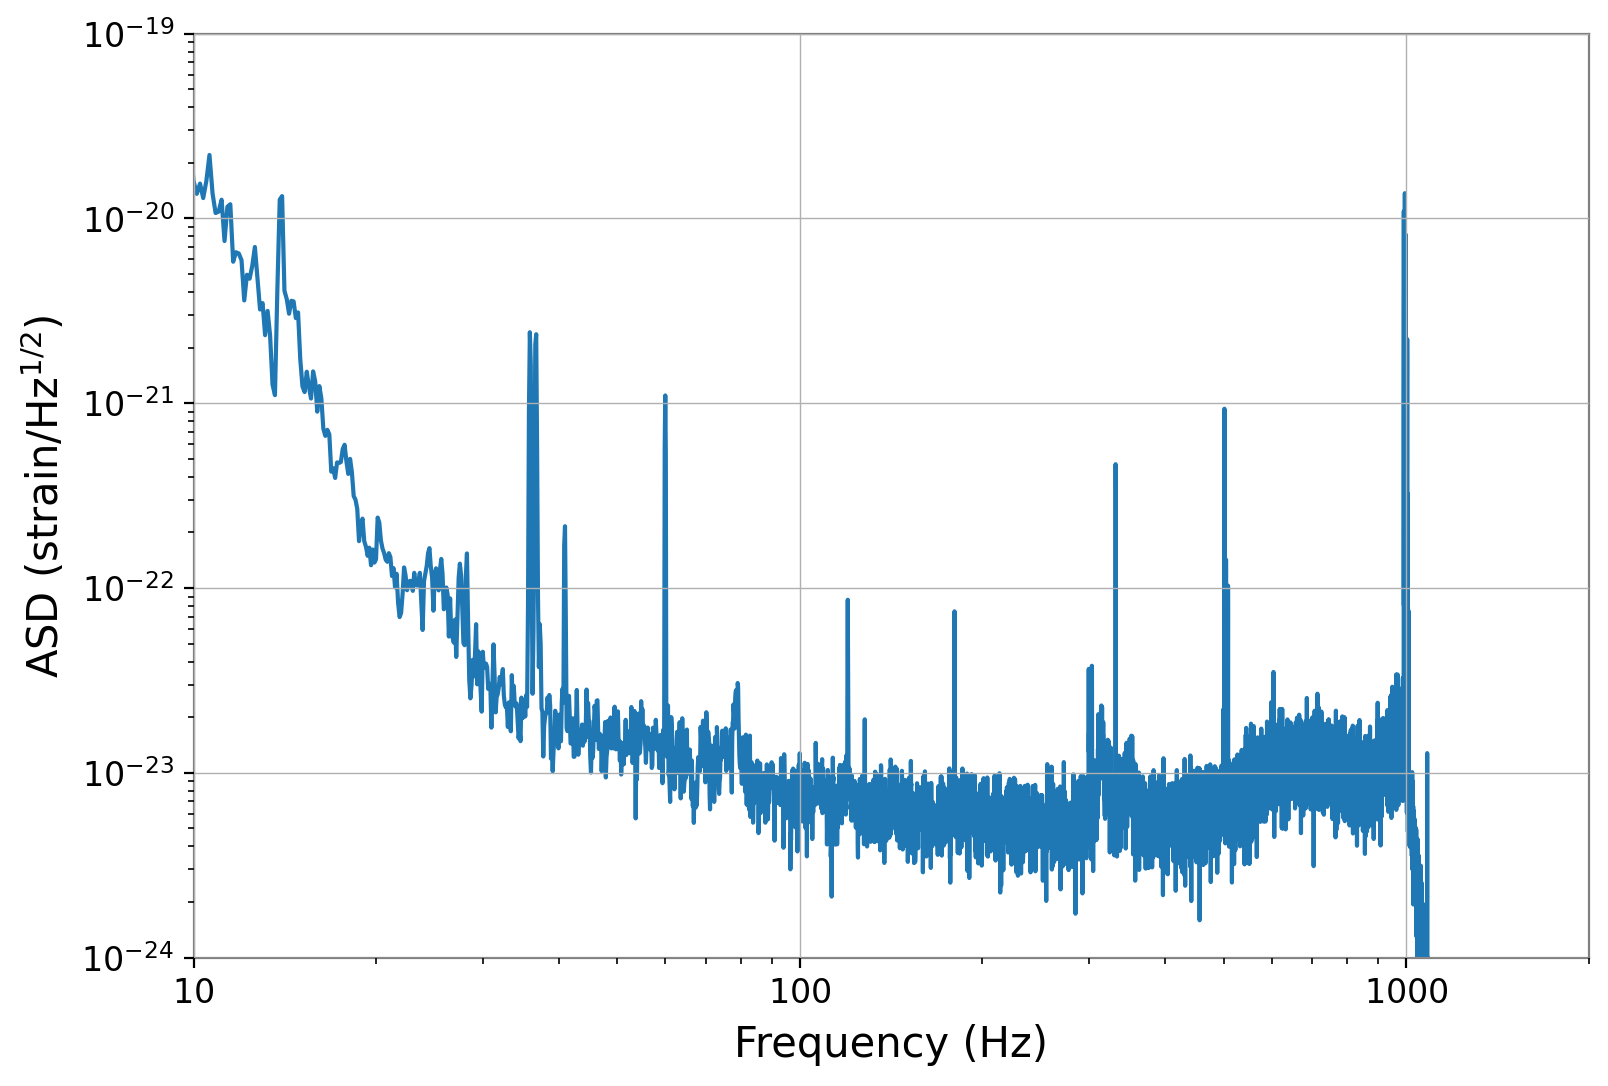

<TimeSeries([ 0.01026349, -0.04384023, -0.01024432, ...,
              0.10743095,  0.06862419,  0.08629983]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625945e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [ ]:
def bandpass(bandpass_low, bandpass_high):
    white_data_bp = white_data.bandpass(bandpass_low, bandpass_high)

    plt.clf()
    white_data_bp.plot()
    plt.ylabel('strain(whitened + band-pass)')
    plt.title('32 Second Window around GW')
    plt.show()

    plt.clf()
    white_data_bp.plot()
    plt.ylabel('strain(whitened + baandpass)')
    plt.xlim(tevent-0.15, tevent+0.15)
    plt.title('0.3 Second Window around GW')
    plt.show()

    strain_bandpass = strain.bandpass(bandpass_low, bandpass_high)
    asd = strain_bandpass.asd(fftlength=8)
    plt.clf()
    asd.plot()
    plt.xlim(10,2000)
    plt.ylim(1e-24, 1e-19)
    plt.ylabel('ASD (strain/Hz$^{1/2})$')
    plt.xlabel('Frequency (Hz)')
    plt.show()

    return white_data_bp

bandpass_low, bandpass_high = [1,1000]
bandpass(bandpass_low, bandpass_high)

<Figure size 900x600 with 0 Axes>

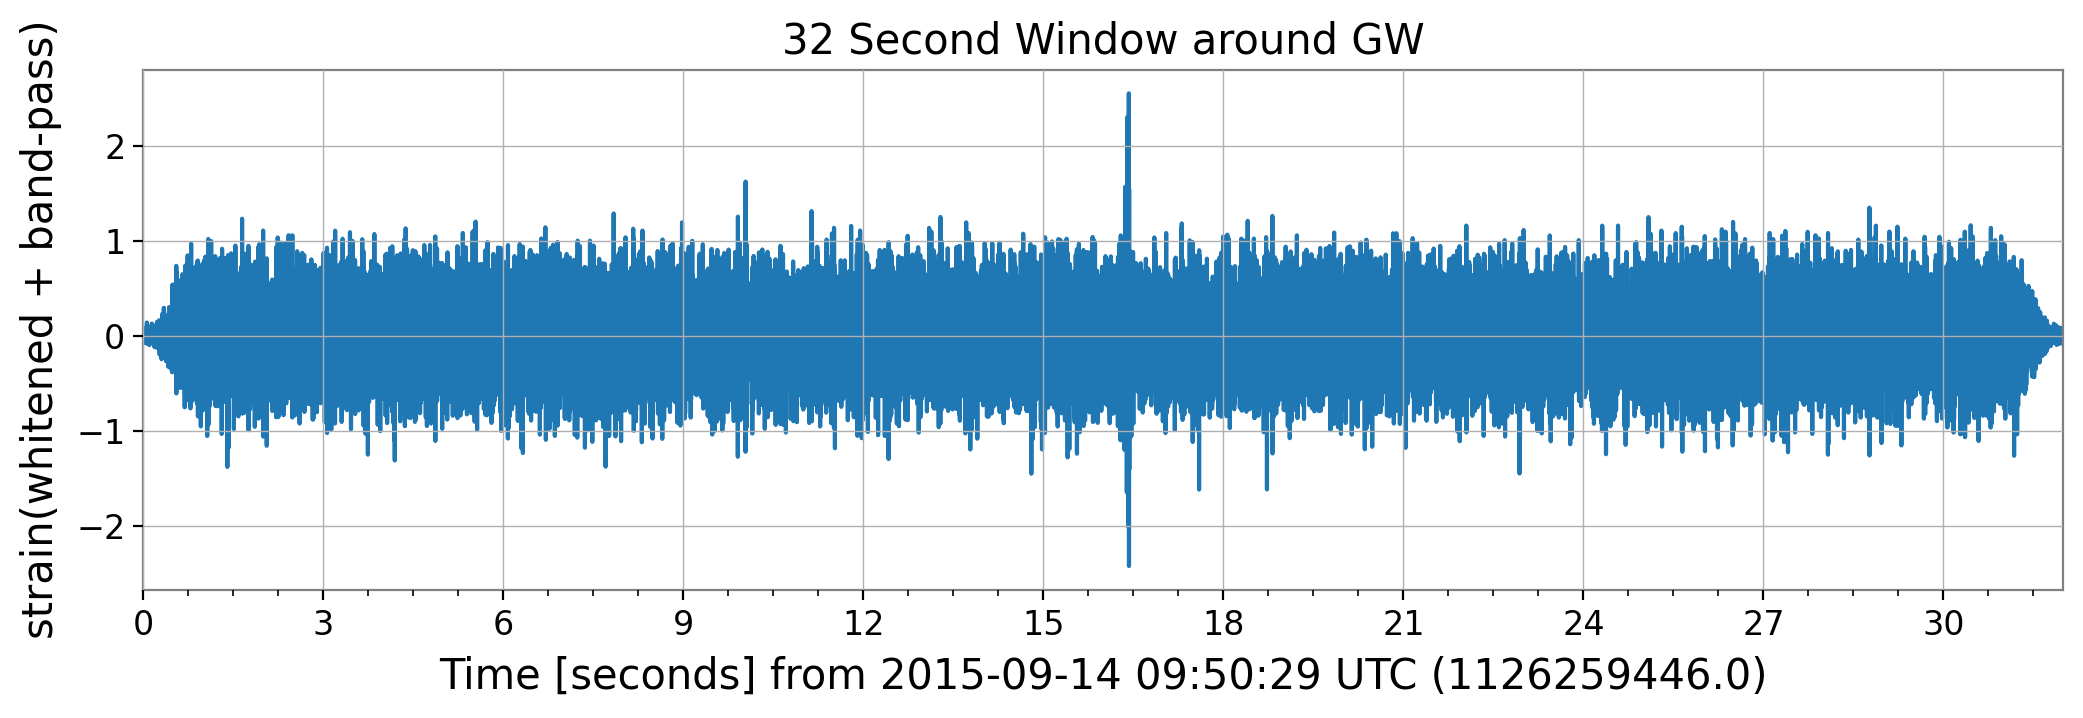

<Figure size 900x600 with 0 Axes>

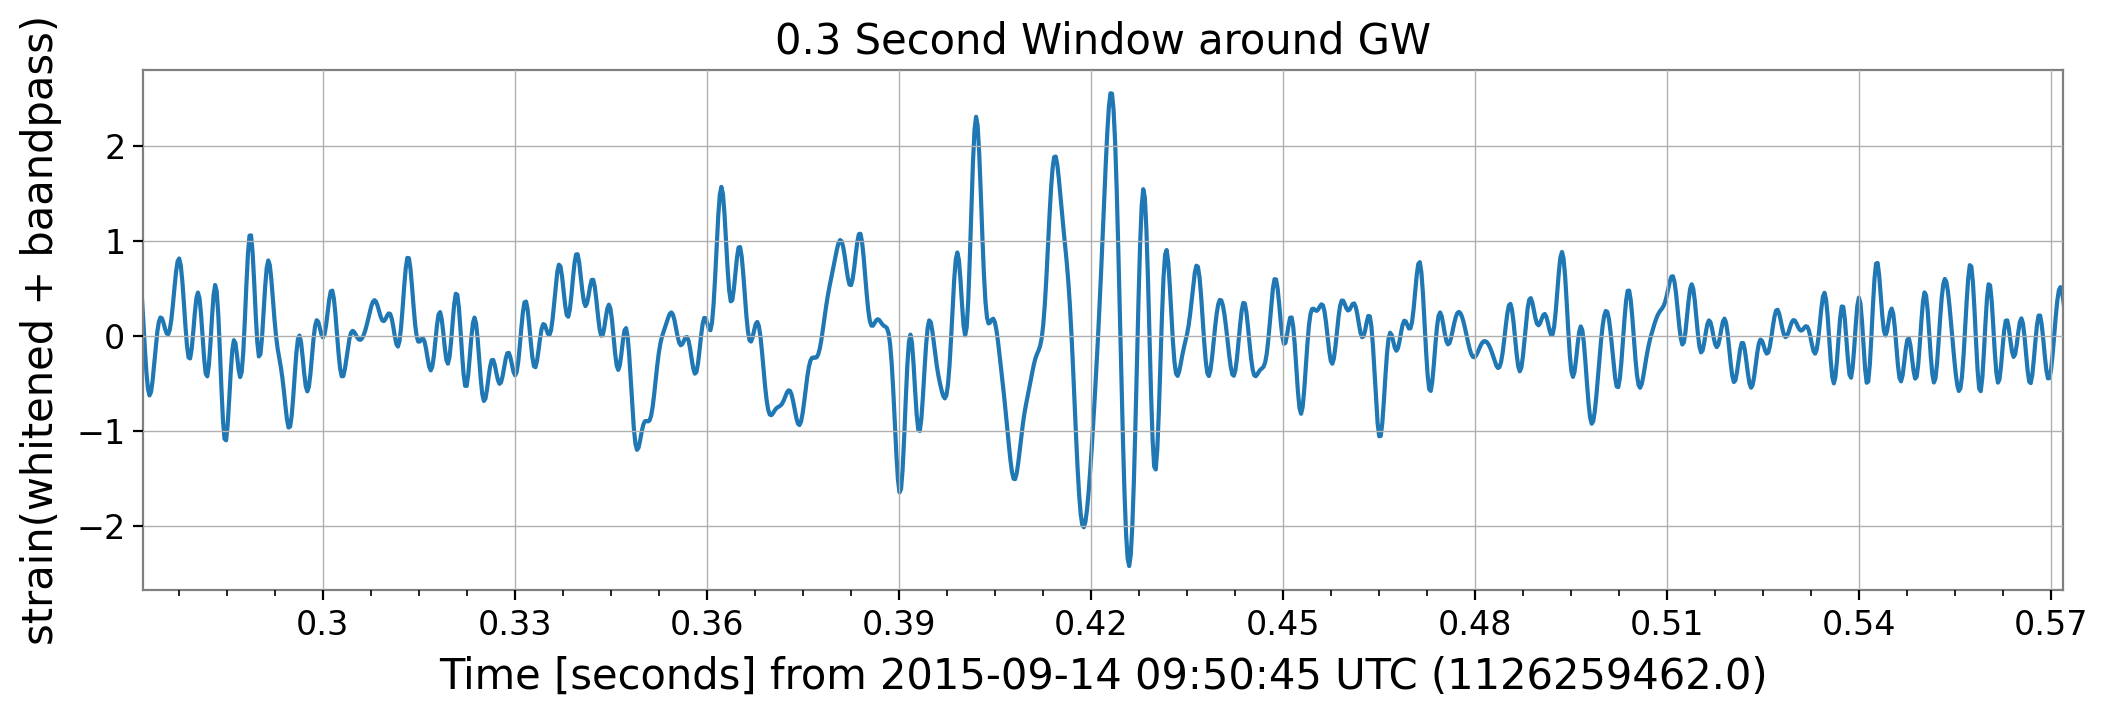

<Figure size 900x600 with 0 Axes>

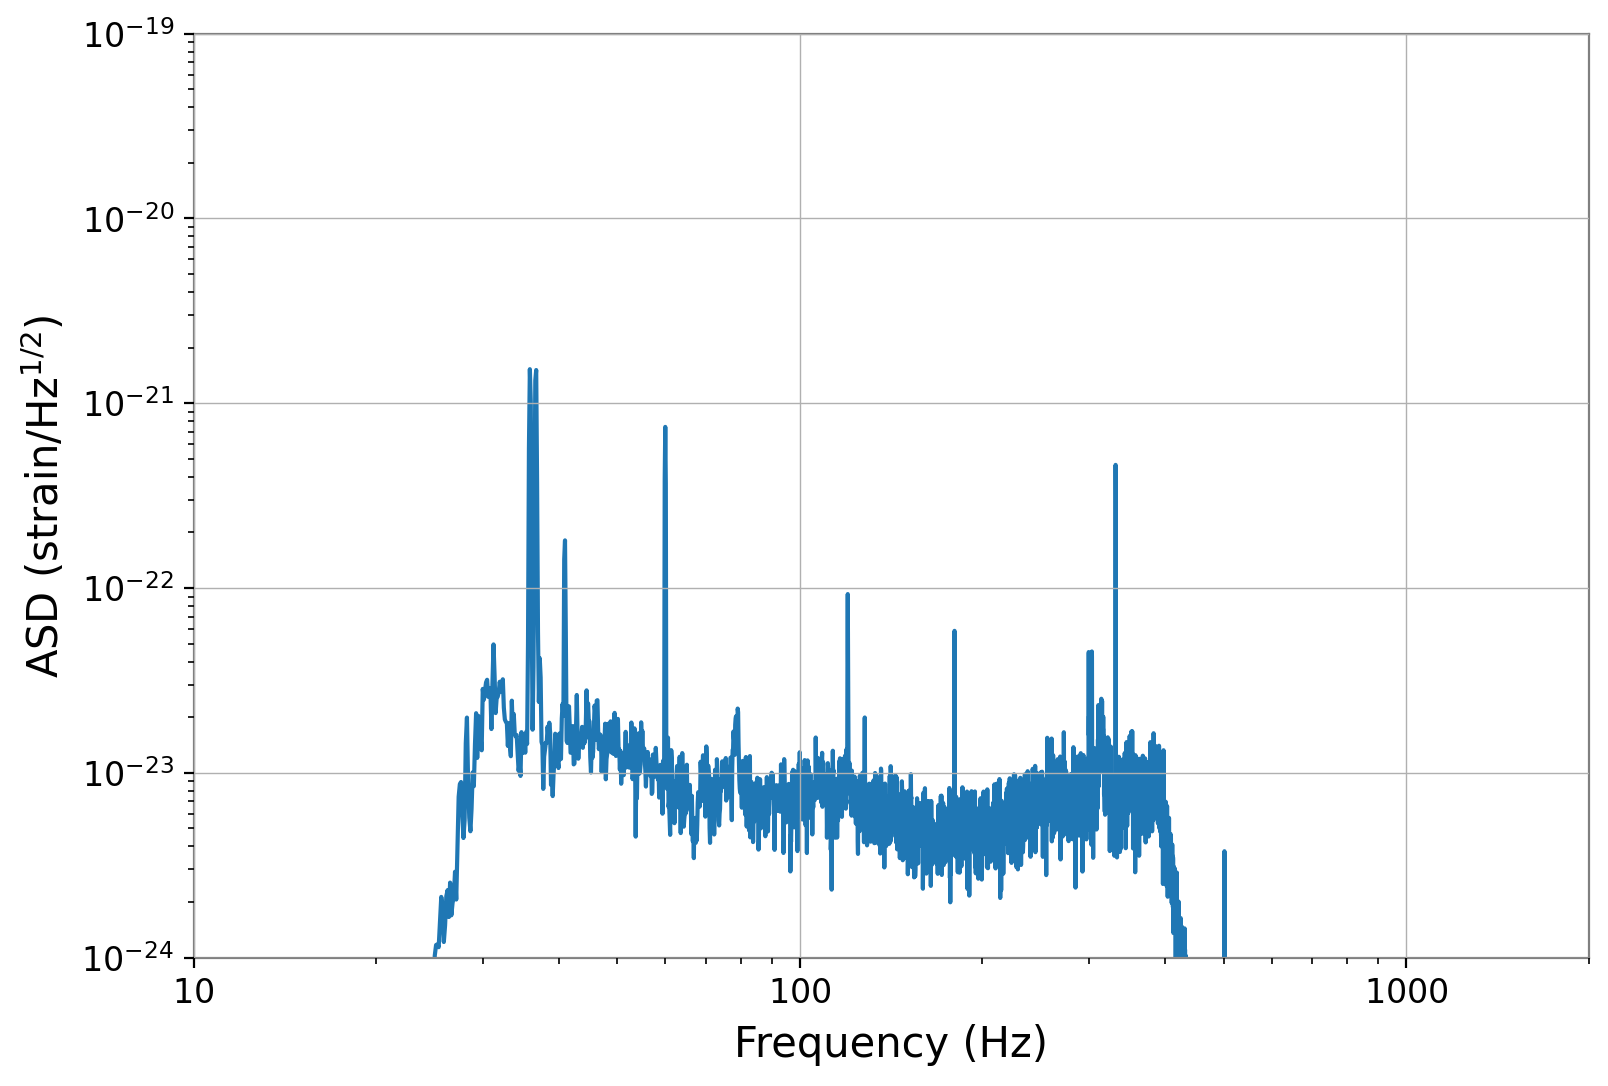

In [ ]:
bandpass_low = 30
bandpass_high = 400

white_data_bp = bandpass(bandpass_low, bandpass_high)


In [ ]:
def gwfreq(iT, iM, iT0, cutoff = 2e-3):
    const = 948.5 * np.power(np.divide(1,iM),5/8)
    idelta_T = np.subtract(iT0,iT)
    output = const*np.power(np.maximum(idelta_T, cutoff), -3/8)
    return output

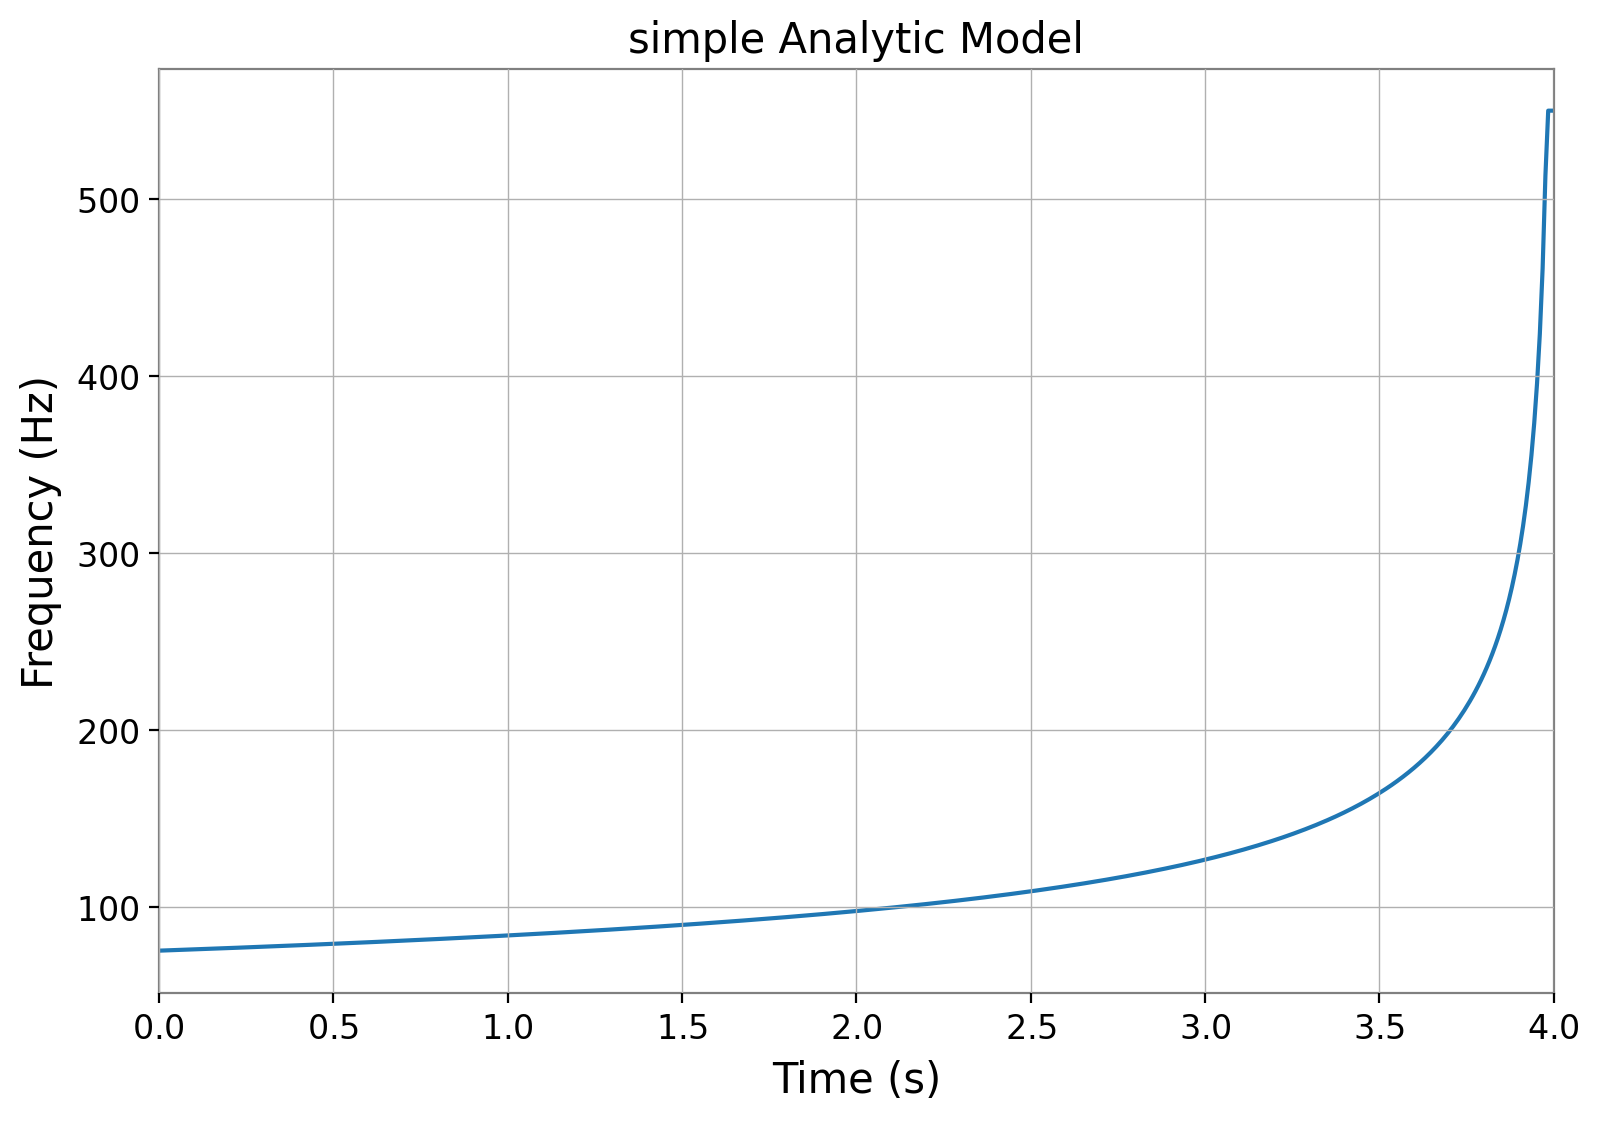

<Figure size 900x600 with 0 Axes>

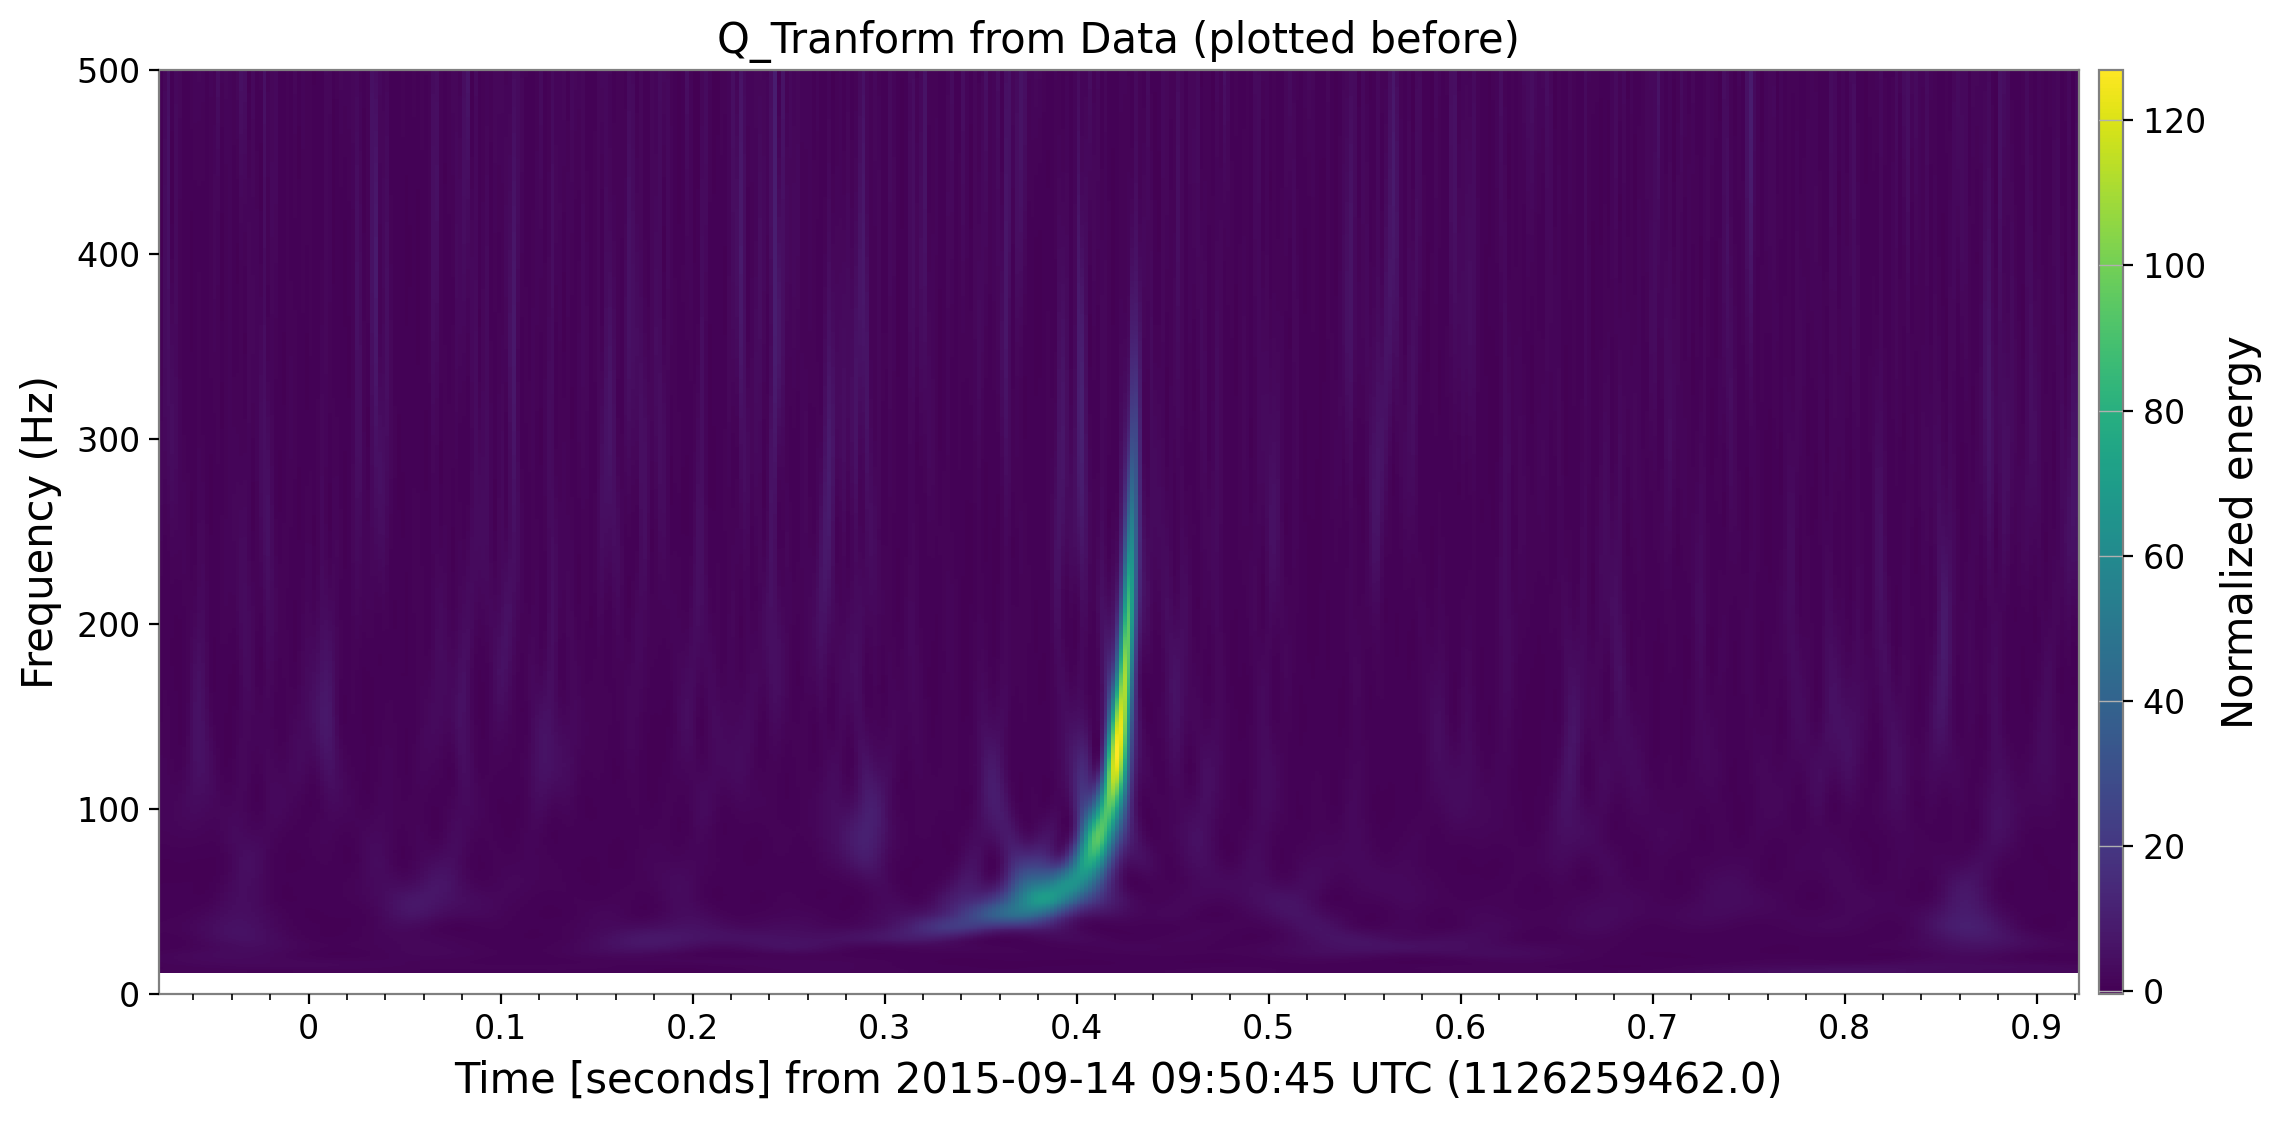

In [ ]:
times = np.linspace(0, 4, 500)
freq = gwfreq( iT = times , iM = 25, iT0=4, cutoff=2e-2)

plt.clf()
plt.plot(times, freq)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('simple Analytic Model')
plt.xlim(0,4)
plt.show()

dt = 1
hq = strain.q_transform(outseg=(tevent-dt,tevent+dt))
plt.clf()
fig = hq.plot()
ax = fig.gca()
fig.colorbar(label = "Normalized energy")
ax.grid(False)
plt.xlim(tevent-0.5, tevent+0.5)
plt.ylim(0,500)
plt.ylabel('Frequency (Hz)')
plt.title('Q_Tranform from Data (plotted before)')
plt.show()


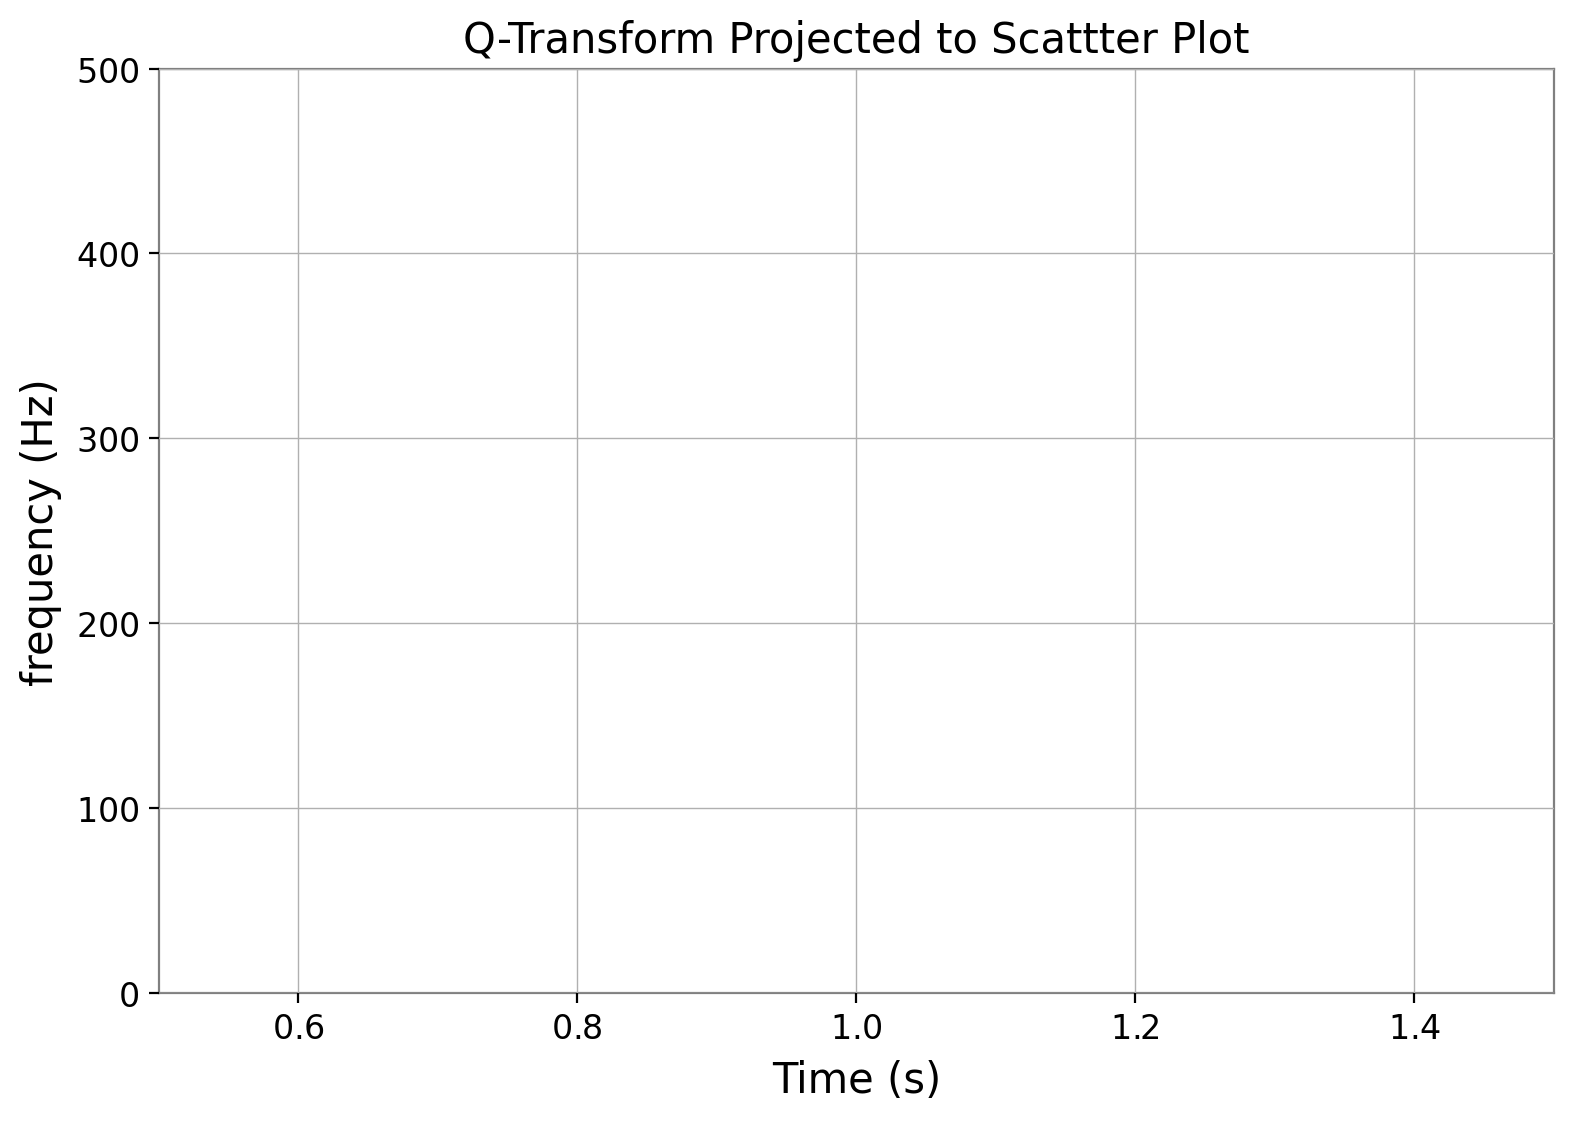

In [ ]:
def project_spectrogram(hq, threshold= 30):

    '''
    Given a spectrogram and threshold, this function will project down the 3D
    spectrogram into a scatter plot by picking the points in intensity that lie
    above the threshold

    hq : spectrogram
    threshold : energy intensity above which points are chosen for projection
    '''

    projected_spec_times = []
    projected_spec_freq = []

    offset = hq.t0
    hq.times -= hq.t0
    hq_times = hq.times.value
    hq_freq = hq.frequencies.value
    hq_values = hq.value

    for x_pixel in range(hq.shape[0]):
        for y_pixel in range(hq.shape[1]):
            if hq_values[x_pixel, y_pixel] > threshold:
                projected_spec_times.append(hq_times[x_pixel])
                projected_spec_freq.append(hq_freq[y_pixel])

    fixed_projection_times = []
    fixed_projection_freq= []
    pool = []
    for i in range(len(projected_spec_times)-1):
        if projected_spec_times[i] == projected_spec_times[i+1]:
            pool.append(projected_spec_freq[i])
        else:
            fixed_projection_times.append(projected_spec_freq[i])
            fixed_projection_freq.append(np.mean(pool))
            pool = []
    return fixed_projection_times, fixed_projection_freq

projected_spec_times, projected_spec_freq = project_spectrogram(hq)

plt.figure()
plt.scatter(projected_spec_times, projected_spec_freq)
plt.xlim((0.5,1.5))
plt.ylim((0,500))
plt.xlabel('Time (s)')
plt.ylabel('frequency (Hz)')
plt.title('Q-Transform Projected to Scattter Plot')
plt.show()

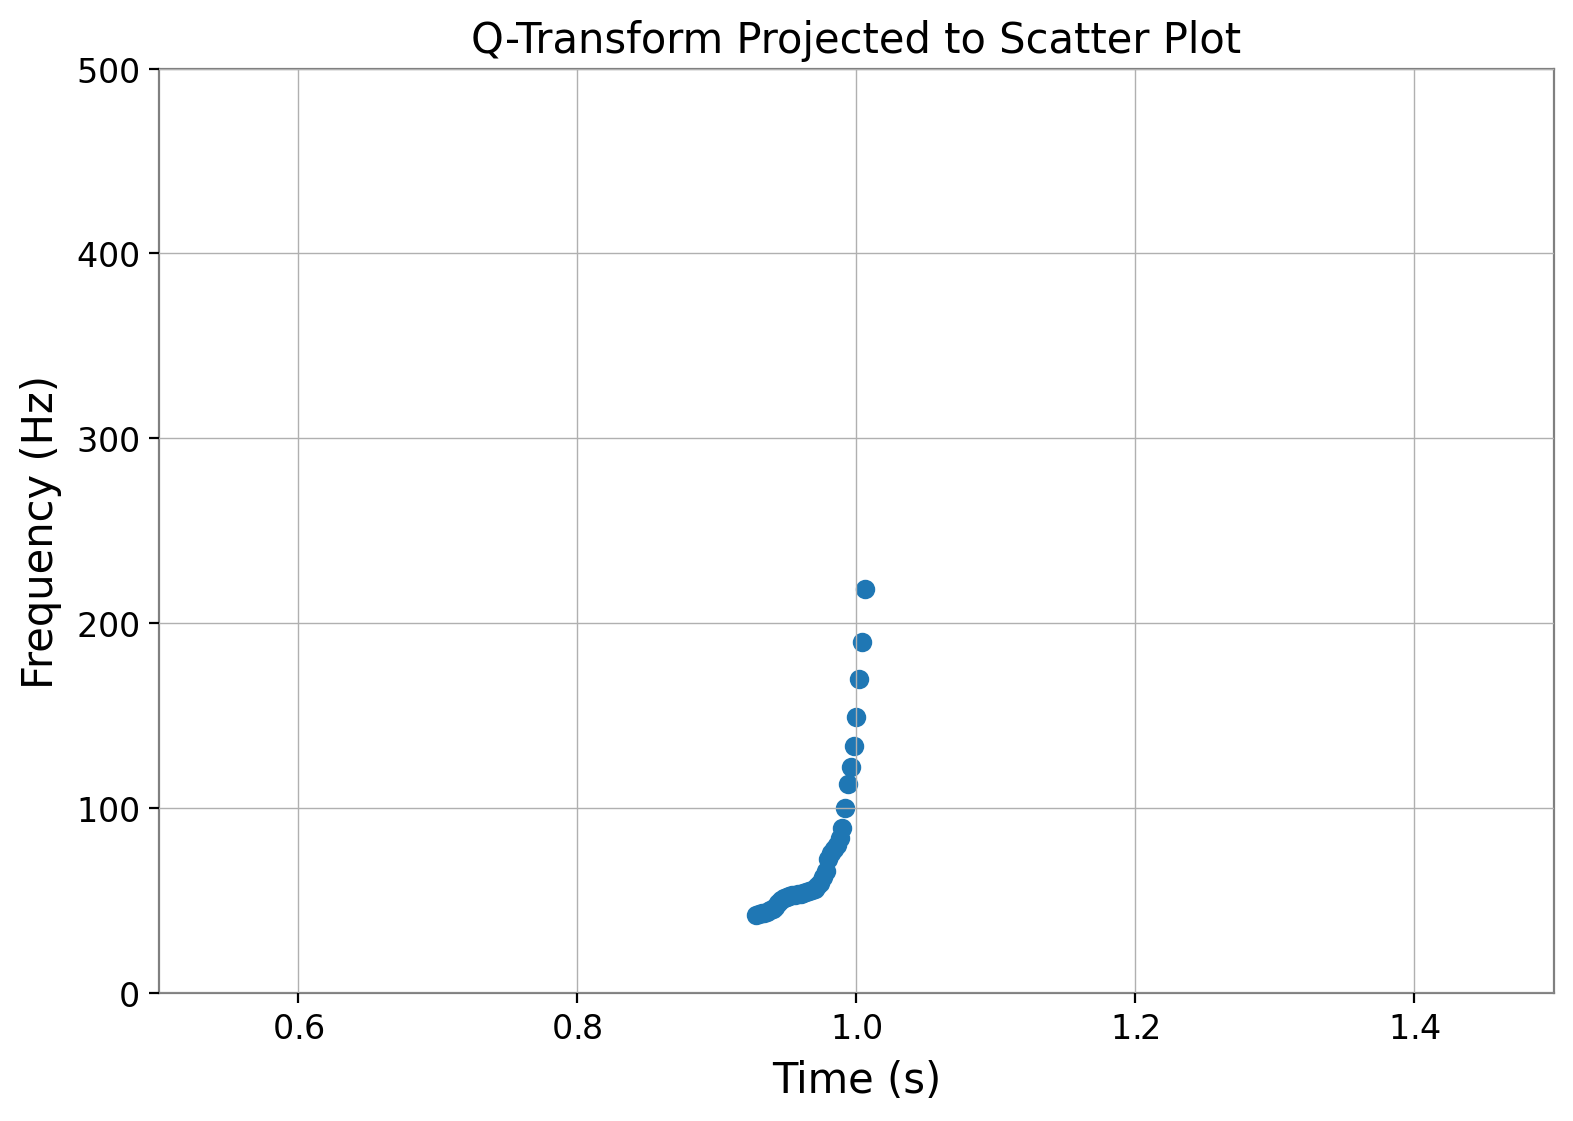

In [ ]:
#>>>RUN: PROJ1.3-runcell02

def project_spectrogram(hq, threshold=30):
  '''
  Given a spectrogram and threshold, this function will project down the 3D
  spectrogram into a scatter plot by picking the points in intensity that lie
  above the threshold

  hq : spectrogram
  threshold : energy intensity above which points are chosen for projection
  '''
  projected_spec_times = []
  projected_spec_freq = []

  offset = hq.t0
  hq.times -= hq.t0
  hq_times = hq.times.value
  hq_freq = hq.frequencies.value
  hq_values = hq.value

  # Pick spectrogram values above threshold
  for x_pixel in range(hq.shape[0]):
      for y_pixel in range(hq.shape[1]):
          if hq_values[x_pixel, y_pixel] > threshold:
            projected_spec_times.append(hq_times[x_pixel])
            projected_spec_freq.append(hq_freq[y_pixel])

  # Average over y-values corresponding to same x-values
  fixed_projection_times = []
  fixed_projection_freq = []
  pool = []
  for i in range(len(projected_spec_times)-1):
    if projected_spec_times[i] == projected_spec_times[i+1]:
      pool.append(projected_spec_freq[i])
    else:
      fixed_projection_times.append(projected_spec_times[i])
      fixed_projection_freq.append(np.mean(pool))
      pool = []
  return fixed_projection_times, fixed_projection_freq

projected_spec_times, projected_spec_freq = project_spectrogram(hq)

plt.figure()
plt.scatter(projected_spec_times, projected_spec_freq)
plt.xlim((0.5, 1.5))
plt.ylim((0, 500))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Q-Transform Projected to Scatter Plot')
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 40
    # variables        = 3
    chi-square         = 29.6386597
    reduced chi-square = 0.80104486
    Akaike info crit   = -5.99199496
    Bayesian info crit = -0.92535660
[[Variables]]
    iM:      656.930990 +/- 33.2391548 (5.06%) (init = 25)
    iT0:     1.00136414 +/- 6.4568e-04 (0.06%) (init = 1)
    cutoff:  0.00165048 +/- 1.7640e-04 (10.69%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(iM, cutoff)  = -0.7890
    C(iM, iT0)     = -0.7134
    C(iT0, cutoff) = +0.5629


<function matplotlib.pyplot.show(close=None, block=None)>

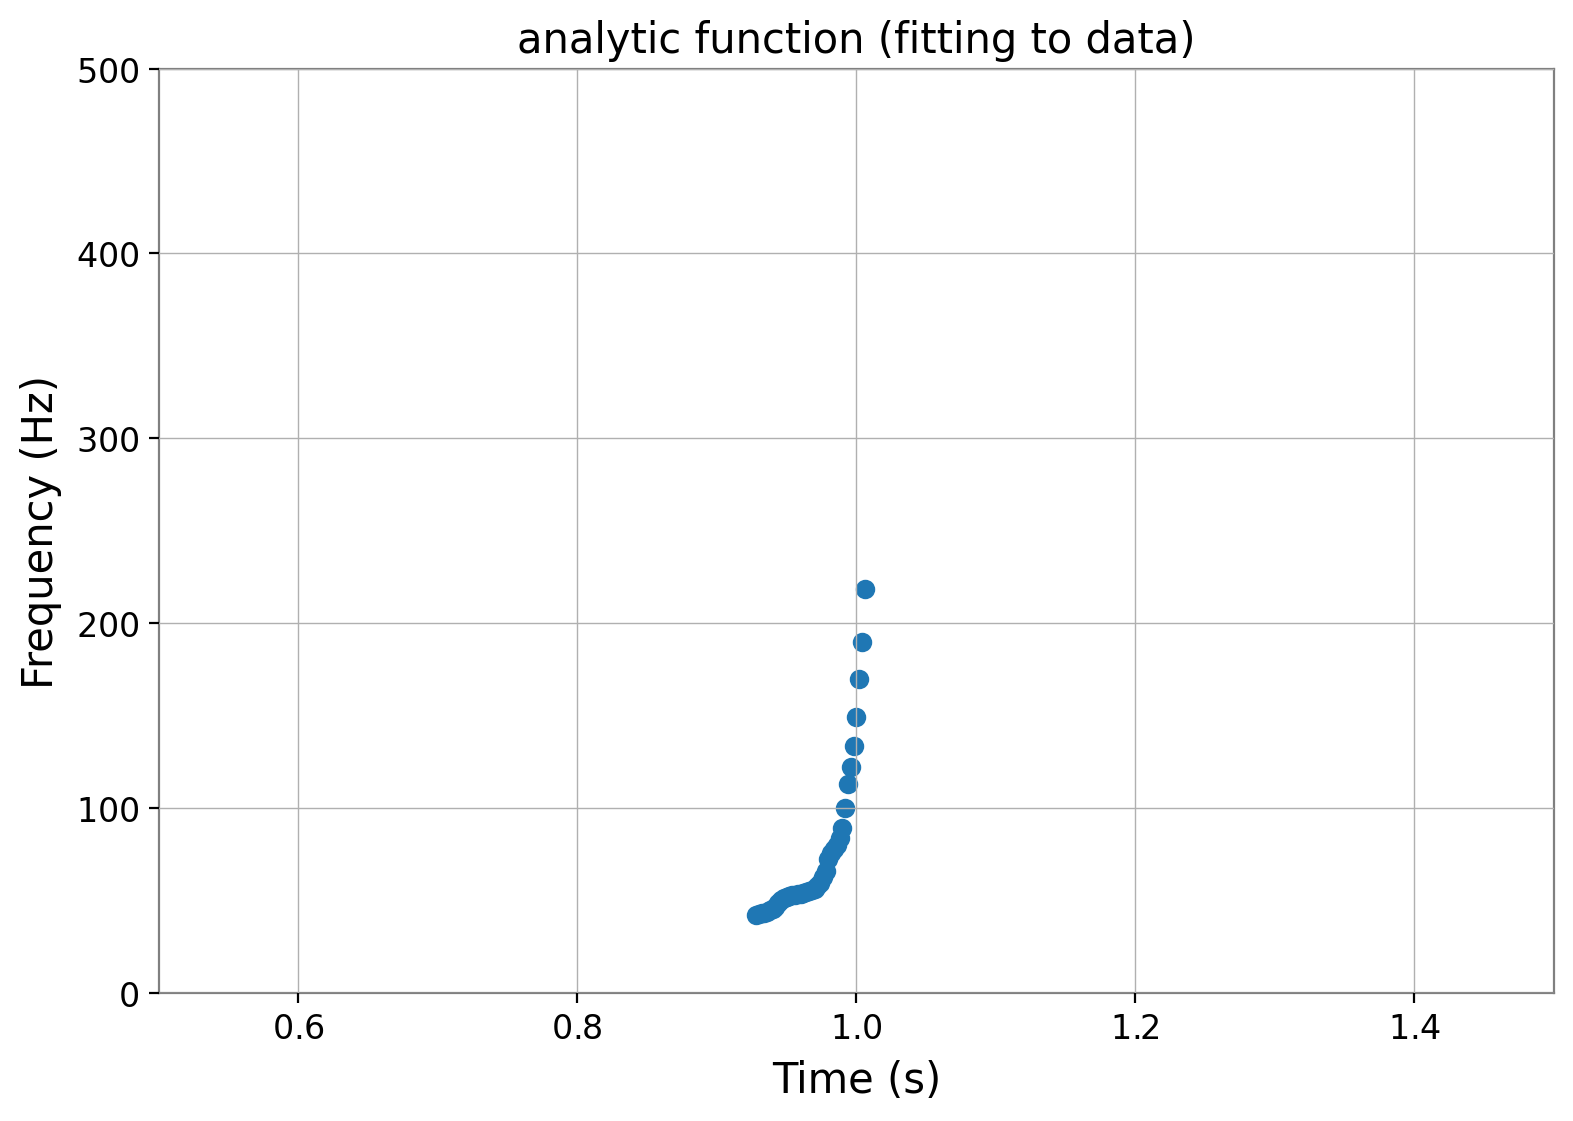

In [ ]:
def gwfreq_dif( params, x, data, eps):
    iM = params[ "iM"]
    iT0 = params["iT0"]
    cutoff = params["cutoff"]
    val = gwfreq(x, iM, iT0, cutoff)
    return (val- data)/eps

model = lmfit.Model(gwfreq)
p = model.make_params()
p['iM'].set(25)
p['iT0'].set(1)
p['cutoff'].set(2e-2)
unc = np.full(len(projected_spec_freq),10)
out = minimize(gwfreq_dif, params= p, args= (projected_spec_times, projected_spec_freq, unc))
print(fit_report(out))

plt.figure()
plt.scatter(projected_spec_times, projected_spec_freq)
plt.xlim((0.5, 1.5))
plt.ylim((0, 500))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('analytic function (fitting to data)')
plt.show



<Figure size 900x600 with 0 Axes>

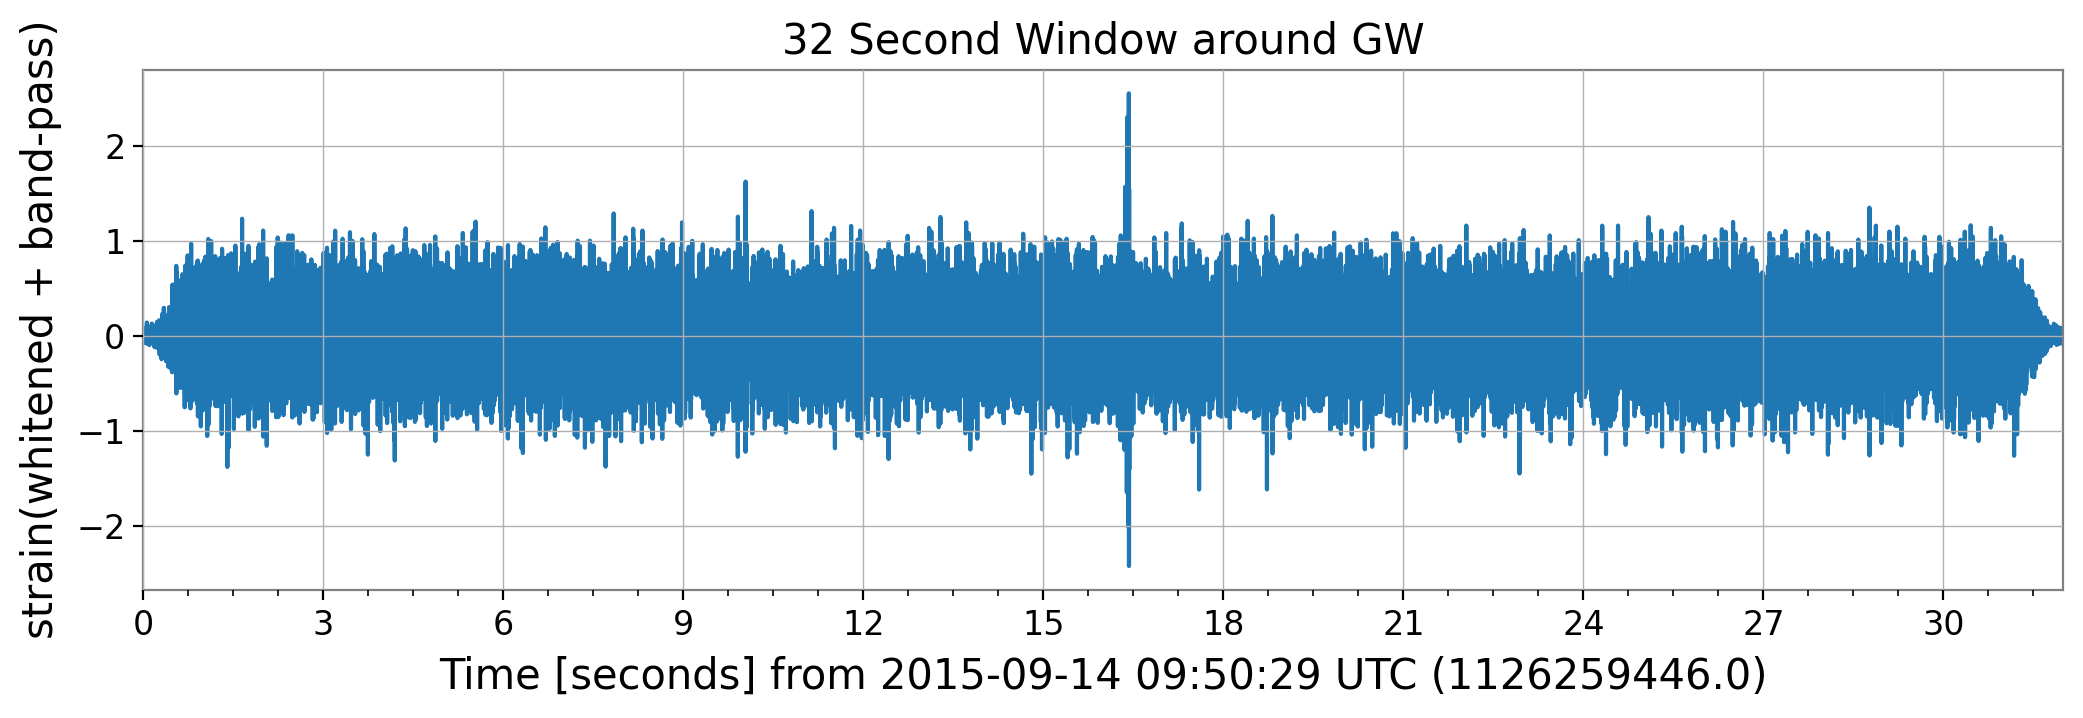

<Figure size 900x600 with 0 Axes>

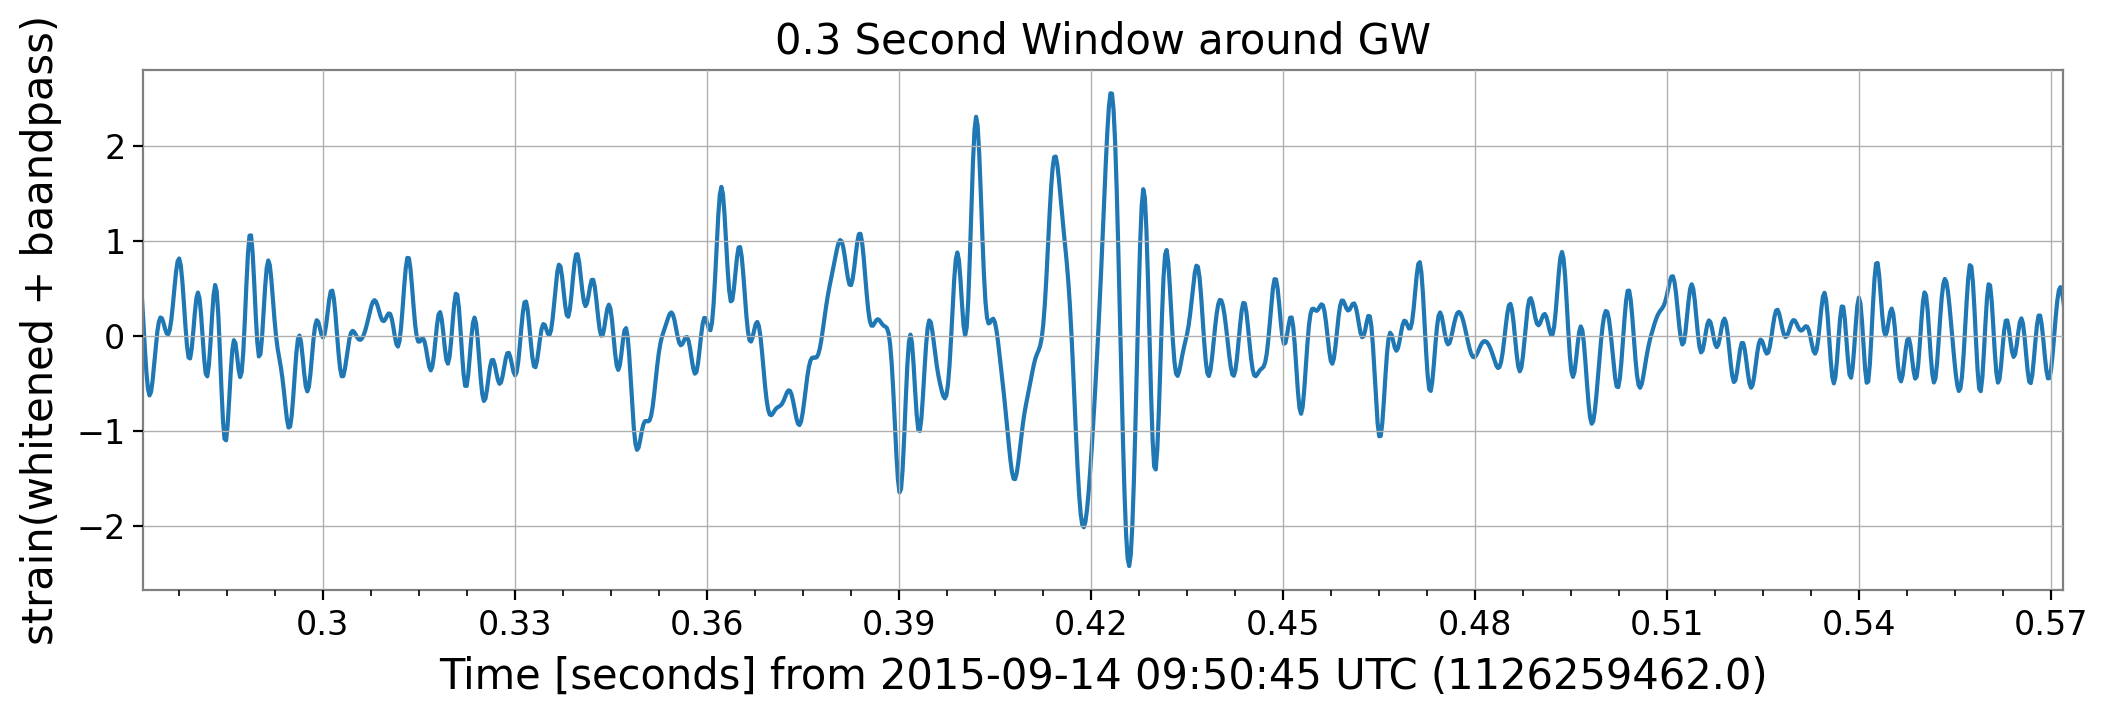

<Figure size 900x600 with 0 Axes>

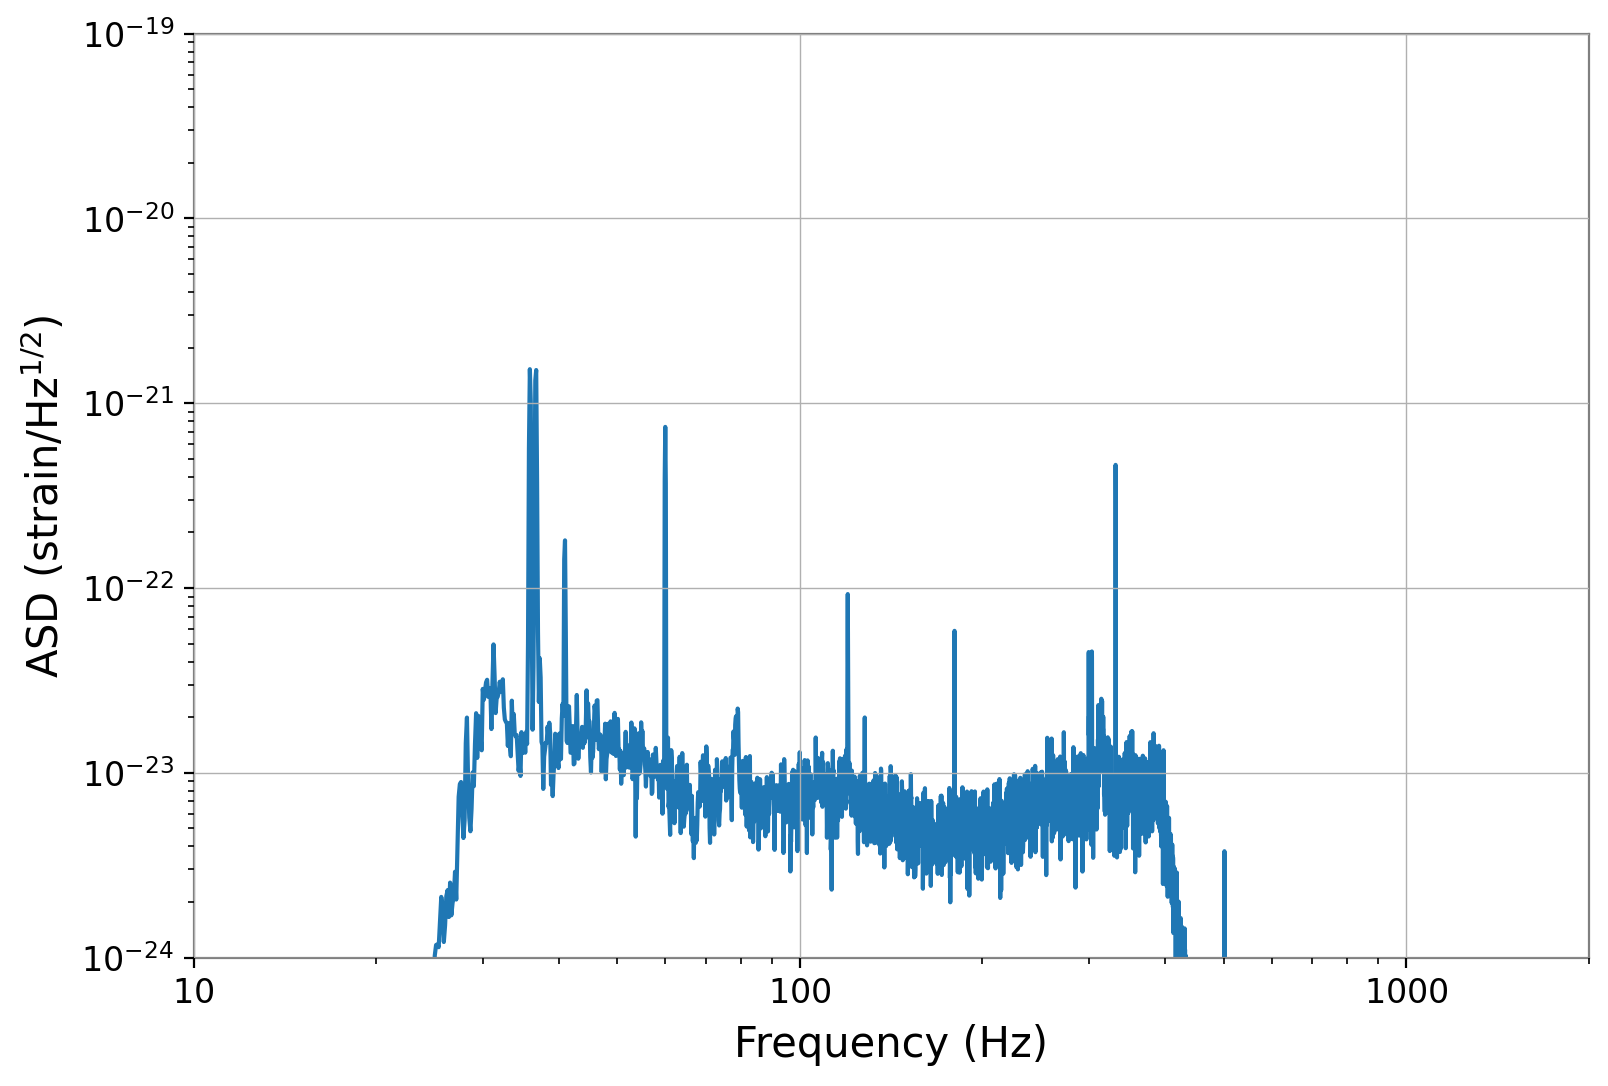

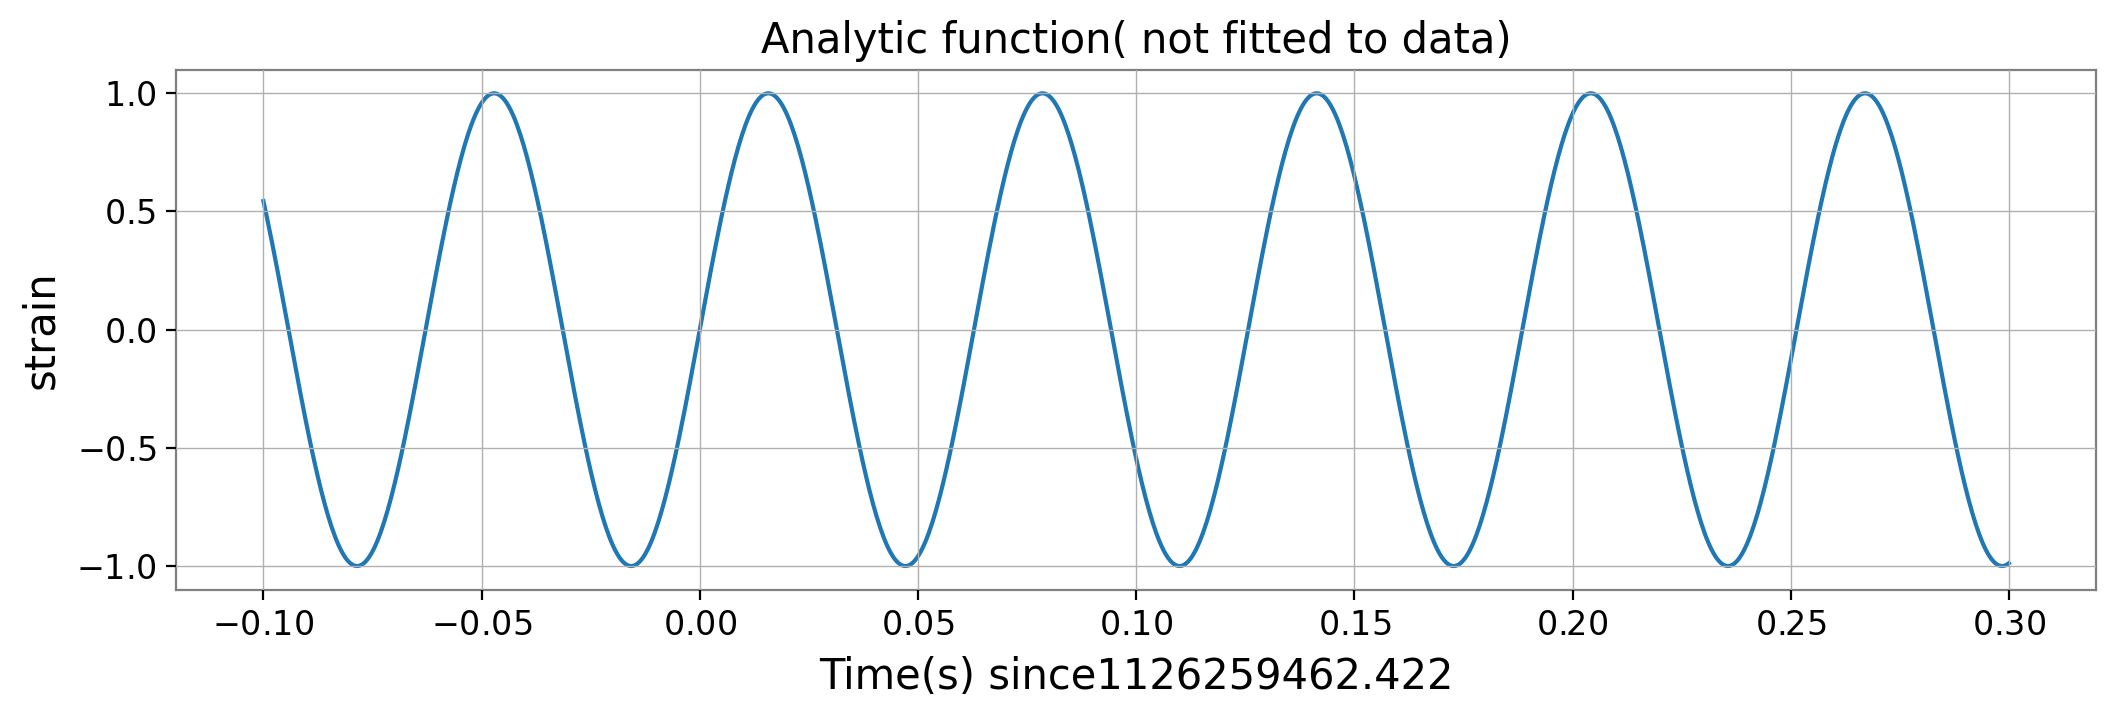

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 1228
    # variables        = 6
    chi-square         = 1842.83937
    reduced chi-square = 1.50805186
    Akaike info crit   = 510.470605
    Bayesian info crit = 541.149458
##  Warning: uncertainties could not be estimated:
    Mc:      at initial value
    t0:      at initial value
    cutoff:  at initial value
    C:       at initial value
[[Variables]]
    Mc:      25.0000000 (init = 25)
    t0:      0.17000000 (init = 0.17)
    cutoff:  0.00200000 (init = 0.002)
    C:       1.0000e-12 (init = 1e-12)
    phi:     0.00000000 (init = 0)
    tau:     0.00000000 (init = 0)


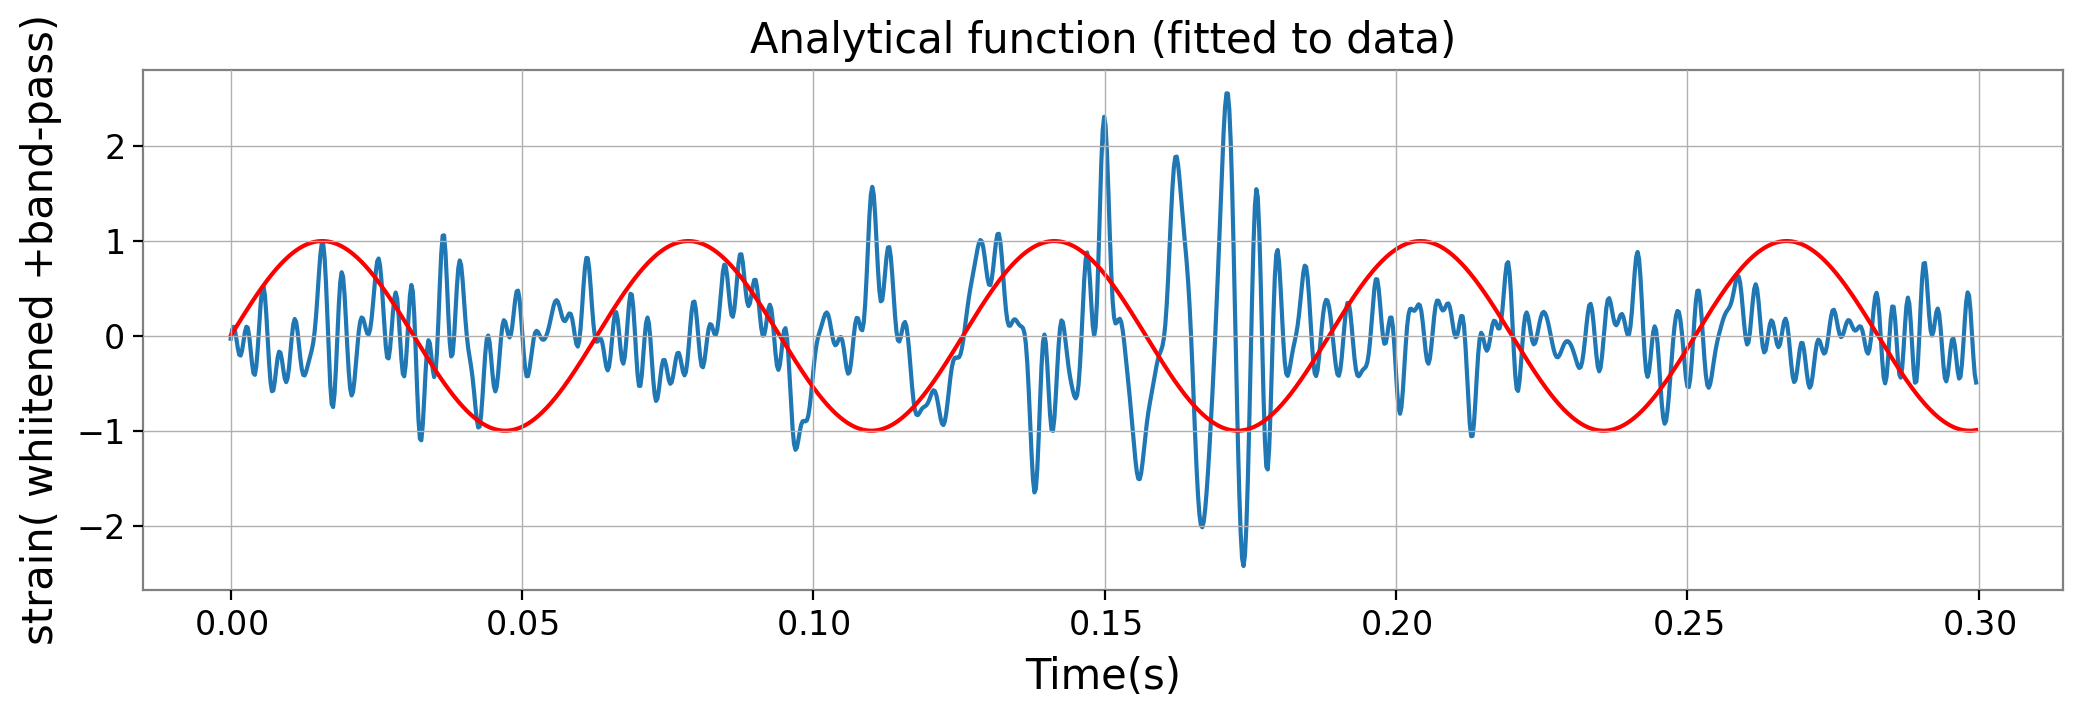

In [ ]:
bandpass_low = 30
bandpass_high = 400
white_data_bp = bandpass(bandpass_low, bandpass_high)


def osc_dif(params, x, data, eps):
    iM = params[ "Mc"]
    iT0 = params["t0"]
    cutoff = params['cutoff']
    norm = params['cutoff']
    phi = params["phi"]
    tau = params["tau"]

    val = osc(x,iM , iT0, cutoff, norm , phi, tau)
    return (val-data/eps)

def plot_fit_function_notfitted(function):
    times = np.linspace(-0.1, 0.3, 1000)
    freq = function (times, 30 , 0.18, 1e-2, 1, 0, 0)
    plt.figure(figsize = (12,4))
    plt.subplots_adjust(left = 0.1, right = 0.9, top= 0.85, bottom=0.2)
    plt.plot(times, freq)
    plt.xlabel('Time(s) since'+ str(tevent))
    plt.ylabel('strain')
    plt.title('Analytic function( not fitted to data)')
    plt.show()

def plot_fit_function_fitted(function):
    sample_times = white_data_bp.times.value
    sample_data = white_data_bp.value
    indxt = np.where((sample_times >= (tevent-0.17))& (sample_times < (tevent +0.13)))
    x = sample_times[indxt]
    x = x-x[0]
    white_data_bp_zoom = sample_data[indxt]
    plt.figure(figsize =(12,4))
    plt.subplots_adjust(left =0.1, right= 0.9, top=0.85, bottom=0.2)
    plt.plot(x,white_data_bp_zoom)
    plt.xlabel('Time(s)')
    plt.ylabel('strain( whiitened +band-pass)')

    model = lmfit.Model(osc)
    p = model.make_params()
    p['Mc'].set(25)
    p['t0'].set(0.17)
    p['cutoff'].set(2e-3)
    p['C'].set(1e-12)
    p['phi'].set(0)
    p['tau'].set(0)

    unc= np.full(len(white_data_bp_zoom),np.std(white_data_bp_zoom))
    out = minimize(osc_dif, params= p, args=(x, white_data_bp_zoom,unc))
    print(fit_report(out))
    plt.plot(x, model.eval(params=out. params, t=x), 'r', label='best fit')
    plt.title('Analytical function (fitted to data)')
    plt.show()

def osc(t, Mc, t0, cutoff, C, phi, tau):
    val = np.sin(100*t)
    return val

plot_fit_function_notfitted(osc)
plot_fit_function_fitted(osc)


In [ ]:
def osc(t,Mc, t0, cutoff, C, phi, tau):
    freq = gwfreq(t, Mc, t0, cutoff)
    Eq17 = C* np.power(Mc*freq,10/3)*(np.cos(freq*(t0-t)+phi))
    val = Eq17 * ((t<=t0)*1 + (t>t0)* np.exp((freq/2*np.pi))*(t0-t))
    return val

